In [1]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [2]:
!pip install deepface

     |████████████████████████████████| 61kB 2.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 5.0MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=922efff4989df9529e905679b82a89f6888d0f93a74ceff9751f277c91736d86
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [3]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from keras.callbacks import ModelCheckpoint

from IPython import display




import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [4]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [5]:
import matplotlib.pyplot as plt
def plot_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

  plt.show()

In [6]:
import os
from pathlib import Path
import gdown
from functools import partial

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, concatenate
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import load_model
tf_version = int(tf.__version__.split(".")[0])
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow
import zipfile
from tensorflow.keras.layers import Convolution2D, LocallyConnected2D, Add, Dropout
from tensorflow.keras.layers import Concatenate


if tf_version == 1:
	from keras.models import Model, Sequential
	from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
else:
	from tensorflow import keras
	from tensorflow.keras.models import Model, Sequential
	from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
	


In [7]:
import time
from os import path
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace, DeepID, DlibWrapper, ArcFace, Boosting
from deepface.commons import functions, realtime, distance as dst
from keras.preprocessing import image as image_keras_preprocessing

#################

def postProcesssing(img, grayscale=False,target_size=(160,160)):
  #post-processing
  if grayscale == True:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = cv2.resize(img, target_size)
  #TODO: resize causes transformation on base image, you should add black pixels to rezie it to target_size

  img_pixels = image_keras_preprocessing.img_to_array(img)
  img_pixels = np.expand_dims(img_pixels, axis = 0)
  img_pixels /= 255 #normalize input in [0, 1]
  return img_pixels


def getFaceImages(images, listWithFaceDetectors=["ssd", "opencv","mtcnn","dlib", "retinaface"], grayscale=False, enforce_detection = True, align = True):
  #detect face in all images
  FRimages=list()
  for image in images: 
    managed_to_find_face=False
    for detector_backend in listWithFaceDetectors:
      try:
          img, region = functions.detect_face(img = image, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection, align = align)
          #--------------------------
          if img.shape[0] == 0 or img.shape[1] == 0:
            if enforce_detection == True:
              raise ValueError("Detected face shape is ", img.shape,". Consider to set enforce_detection argument to False.")
            else: #restore base image
              img = base_img.copy()
          #--------------------------

        #   img = functions.preprocess_face(img = image
        # , target_size=(input_shape_y, input_shape_x)
        # , enforce_detection = enforce_detection
        # , detector_backend = detector_backend
        # , align = align)
          managed_to_find_face=True
          FRimages.append(img)
          break;
      except ValueError: 
        continue
    if(managed_to_find_face==False):
      print("I COUNT NOT FIND THE FACE!!!!!")
      plt.imshow(image)
  return FRimages

def getSizeOfEmbedings(tempImage,model_list):
  sizeOfFinalinput=0;
  tempImage=FRimages[0]
  for model in model_list:
    input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
    img= postProcesssing(tempImage, grayscale=False,target_size=(input_shape_y, input_shape_x))
    curentEmbedings = model.predict(img)[0].tolist()
    sizeOfFinalinput= sizeOfFinalinput+ len(curentEmbedings)
  return sizeOfFinalinput

def getEmbedings(FRimages,sizeOfFinalInput):
  inputSize=(len(FRimages), sizeOfFinalInput)
  embedings=np.empty(inputSize)
  for index, image in enumerate(FRimages):
    image_embedgins= list()
    for model in model_list:
      try:
        input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
        img= postProcesssing(image, grayscale=False,target_size=(input_shape_y, input_shape_x))
        curentEmbedings = model.predict(img)[0].tolist()
        image_embedgins.extend(curentEmbedings)
      except:
        print("i couldnt get embedings")
        plt.imshow(image)
    npEmbedings=np.asarray(image_embedgins)
    print(npEmbedings.shape)
    embedings[index]=npEmbedings
  return embedings


def myRepresent(images,model_list , listWithFaceDetectors=["ssd", "opencv","mtcnn","dlib", "retinaface"], grayscale=False, enforce_detection = True, align = True):
  """
  This function represents facial images as vectors.
  Parameters:
    img_path: exact image path, numpy array or based64 encoded images could be passed.
    model_name (string): VGG-Face, Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace.
    model: Built deepface model. A face recognition model is built every call of verify function. You can pass pre-built face recognition model optionally if you will call verify function several times. Consider to pass model if you are going to call represent function in a for loop.
      model = DeepFace.build_model('VGG-Face')
    enforce_detection (boolean): If any face could not be detected in an image, then verify function will return exception. Set this to False not to have this exception. This might be convenient for low resolution images.
    detector_backend (string): set face detector backend as retinaface, mtcnn, opencv, ssd or dlib
  Returns:
    Represent function returns a multidimensional vector. The number of dimensions is changing based on the reference model. E.g. FaceNet returns 128 dimensional vector; VGG-Face returns 2622 dimensional vector.
  """

  #detect face in all images
  FRimages=getFaceImages(images=images, listWithFaceDetectors=listWithFaceDetectors, grayscale=grayscale, enforce_detection = enforce_detection, align = align)


  tempImage=FRimages[0]
  sizeOfFinalinput=getSizeOfEmbedings(tempImage,model_list)
  print("sizeOfFinalinput "+str(sizeOfFinalinput) )

  embedings=getEmbedings(FRimages,sizeOfFinalInput=sizeOfFinalinput)
  return embedings


Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [8]:
import os
from pathlib import Path
import gdown
from functools import partial

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, concatenate
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import load_model
tf_version = int(tf.__version__.split(".")[0])
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow
import zipfile
from tensorflow.keras.layers import Convolution2D, LocallyConnected2D, Add, Dropout
from tensorflow.keras.layers import Concatenate


if tf_version == 1:
	from keras.models import Model, Sequential
	from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
else:
	from tensorflow import keras
	from tensorflow.keras.models import Model, Sequential
	from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
	


In [9]:
def scaling(x, scale):
	return x * scale

def InceptionResNetV2():
	
	inputs = Input(shape=(160, 160, 3))
	x = Conv2D(32, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_1a_3x3') (inputs)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_1a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_1a_3x3_Activation')(x)
	x = Conv2D(32, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_2a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2a_3x3_Activation')(x)
	x = Conv2D(64, 3, strides=1, padding='same', use_bias=False, name= 'Conv2d_2b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2b_3x3_Activation')(x)
	x = MaxPooling2D(3, strides=2, name='MaxPool_3a_3x3')(x)
	x = Conv2D(80, 1, strides=1, padding='valid', use_bias=False, name= 'Conv2d_3b_1x1') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_3b_1x1_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_3b_1x1_Activation')(x)
	x = Conv2D(192, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_4a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4a_3x3_Activation')(x)
	x = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_4b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4b_3x3_Activation')(x)
	
	# 5x Block35 (Inception-ResNet-A block):
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_1_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_1_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_2_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_2_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_3_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_3_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_4_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_4_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_5_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_5_Activation')(x)

	# Mixed 6a (Reduction-A block):
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_0_Conv2d_1a_3x3') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_6a_Branch_2_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_pool]
	x = Concatenate(axis=3, name='Mixed_6a')(branches)

	# 10x Block17 (Inception-ResNet-B block):
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_1_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_1_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_2_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_2_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_3_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_3_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_4_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_4_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_5_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_5_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_6_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_6_Activation')(x)	
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_7_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_7_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_7_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_7_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_8_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_8_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_8_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_8_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_9_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_9_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_9_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_9_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_10_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_10_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_10_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_10_Activation')(x)

	# Mixed 7a (Reduction-B block): 8 x 8 x 2080	
	branch_0 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_0a_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation')(branch_0)
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_1a_3x3') (branch_0)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_2 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_1a_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation')(branch_2)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_7a_Branch_3_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_2, branch_pool]
	x = Concatenate(axis=3, name='Mixed_7a')(branches)

	# 5x Block8 (Inception-ResNet-C block):
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_1_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_1_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_2_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_2_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_3_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_3_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_4_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_4_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_5_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_5_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_6_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 1})(up)
	x = add([x, up])
	
	# Classification block
	x = GlobalAveragePooling2D(name='AvgPool')(x)
	x = Dropout(1.0 - 0.8, name='Dropout')(x)
	# Bottleneck
	x = Dense(128, use_bias=False, name='Bottleneck')(x)
	x = BatchNormalization(momentum=0.995, epsilon=0.001, scale=False, name='Bottleneck_BatchNorm')(x)

	# Create model
	model = Model(inputs, x, name='inception_resnet_v1')

	return model



#---------------------------------------

def vggbaseModel():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))
	
	return model



#---------------------------------------

def openFaceModel():
  myInput = Input(shape=(96, 96, 3))

  x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
  x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_1')(x)
  x = Conv2D(64, (1, 1), name='conv2')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = Conv2D(192, (3, 3), name='conv3')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
  x = Activation('relu')(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_2')(x) #x is equal added
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)

  # Inception3a
  inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
  inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
  inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

  inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
  inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
  inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

  inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
  inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
  inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
  inception_3a_pool = Activation('relu')(inception_3a_pool)
  inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

  inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
  inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
  inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

  inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

  # Inception3b
  inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
  inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
  inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

  inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
  inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
  inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

  inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
  inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
  inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
  inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
  inception_3b_pool = Activation('relu')(inception_3b_pool)
  inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

  inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
  inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
  inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

  inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

  # Inception3c
  inception_3c_3x3 = Conv2D(128, (1, 1), strides=(1, 1), name='inception_3c_3x3_conv1')(inception_3b)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn1')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
  inception_3c_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3c_3x3)
  inception_3c_3x3 = Conv2D(256, (3, 3), strides=(2, 2), name='inception_3c_3x3_conv'+'2')(inception_3c_3x3)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn'+'2')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)

  inception_3c_5x5 = Conv2D(32, (1, 1), strides=(1, 1), name='inception_3c_5x5_conv1')(inception_3b)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn1')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
  inception_3c_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3c_5x5)
  inception_3c_5x5 = Conv2D(64, (5, 5), strides=(2, 2), name='inception_3c_5x5_conv'+'2')(inception_3c_5x5)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn'+'2')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)

  inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
  inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

  inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

  #inception 4a
  inception_4a_3x3 = Conv2D(96, (1, 1), strides=(1, 1), name='inception_4a_3x3_conv'+'1')(inception_3c)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'1')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)
  inception_4a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4a_3x3)
  inception_4a_3x3 = Conv2D(192, (3, 3), strides=(1, 1), name='inception_4a_3x3_conv'+'2')(inception_4a_3x3)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'2')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)

  inception_4a_5x5 = Conv2D(32, (1,1), strides=(1,1), name='inception_4a_5x5_conv1')(inception_3c)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn1')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)
  inception_4a_5x5 = ZeroPadding2D(padding=(2,2))(inception_4a_5x5)
  inception_4a_5x5 = Conv2D(64, (5,5), strides=(1,1), name='inception_4a_5x5_conv'+'2')(inception_4a_5x5)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn'+'2')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)

  inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
  inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)

  inception_4a_pool = Conv2D(128, (1,1), strides=(1,1), name='inception_4a_pool_conv'+'')(inception_4a_pool)
  inception_4a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_pool_bn'+'')(inception_4a_pool)
  inception_4a_pool = Activation('relu')(inception_4a_pool)
  inception_4a_pool = ZeroPadding2D(padding=(2, 2))(inception_4a_pool)

  inception_4a_1x1 = Conv2D(256, (1, 1), strides=(1, 1), name='inception_4a_1x1_conv'+'')(inception_3c)
  inception_4a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_1x1_bn'+'')(inception_4a_1x1)
  inception_4a_1x1 = Activation('relu')(inception_4a_1x1)

  inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

  #inception4e
  inception_4e_3x3 = Conv2D(160, (1,1), strides=(1,1), name='inception_4e_3x3_conv'+'1')(inception_4a)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'1')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)
  inception_4e_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4e_3x3)
  inception_4e_3x3 = Conv2D(256, (3,3), strides=(2,2), name='inception_4e_3x3_conv'+'2')(inception_4e_3x3)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'2')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)

  inception_4e_5x5 = Conv2D(64, (1,1), strides=(1,1), name='inception_4e_5x5_conv'+'1')(inception_4a)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'1')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
  inception_4e_5x5 = ZeroPadding2D(padding=(2, 2))(inception_4e_5x5)
  inception_4e_5x5 = Conv2D(128, (5,5), strides=(2,2), name='inception_4e_5x5_conv'+'2')(inception_4e_5x5)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'2')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)

  inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
  inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

  inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

  #inception5a
  inception_5a_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_3x3_conv'+'1')(inception_4e)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'1')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
  inception_5a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5a_3x3)
  inception_5a_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5a_3x3_conv'+'2')(inception_5a_3x3)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'2')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)

  inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
  inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)

  inception_5a_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_pool_conv'+'')(inception_5a_pool)
  inception_5a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_pool_bn'+'')(inception_5a_pool)
  inception_5a_pool = Activation('relu')(inception_5a_pool)
  inception_5a_pool = ZeroPadding2D(padding=(1,1))(inception_5a_pool)

  inception_5a_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5a_1x1_conv'+'')(inception_4e)
  inception_5a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_1x1_bn'+'')(inception_5a_1x1)
  inception_5a_1x1 = Activation('relu')(inception_5a_1x1)

  inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

  #inception_5b
  inception_5b_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_3x3_conv'+'1')(inception_5a)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'1')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
  inception_5b_3x3 = ZeroPadding2D(padding=(1,1))(inception_5b_3x3)
  inception_5b_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5b_3x3_conv'+'2')(inception_5b_3x3)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'2')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)

  inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)

  inception_5b_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_pool_conv'+'')(inception_5b_pool)
  inception_5b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_pool_bn'+'')(inception_5b_pool)
  inception_5b_pool = Activation('relu')(inception_5b_pool)

  inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

  inception_5b_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5b_1x1_conv'+'')(inception_5a)
  inception_5b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_1x1_bn'+'')(inception_5b_1x1)
  inception_5b_1x1 = Activation('relu')(inception_5b_1x1)

  inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

  av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
  reshape_layer = Flatten()(av_pool)
  dense_layer = Dense(128, name='dense_layer')(reshape_layer)
  norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

  # Final Model
  model = Model(inputs=[myInput], outputs=norm_layer)
  return model


def deepFaceModel():
  base_model = Sequential()
  base_model.add(Convolution2D(32, (11, 11), activation='relu', name='C1', input_shape=(152, 152, 3)))
  base_model.add(MaxPooling2D(pool_size=3, strides=2, padding='same', name='M2'))
  base_model.add(Convolution2D(16, (9, 9), activation='relu', name='C3'))
  base_model.add(LocallyConnected2D(16, (9, 9), activation='relu', name='L4'))
  base_model.add(LocallyConnected2D(16, (7, 7), strides=2, activation='relu', name='L5') )
  base_model.add(LocallyConnected2D(16, (5, 5), activation='relu', name='L6'))
  base_model.add(Flatten(name='F0'))
  base_model.add(Dense(4096, activation='relu', name='F7'))
  base_model.add(Dropout(rate=0.5, name='D0'))
  base_model.add(Dense(8631, activation='softmax', name='F8'))
  return base_model
	
	#---------------------------------
def deepIDModel():
  myInput = Input(shape=(55, 47, 3))

  x = Conv2D(20, (4, 4), name='Conv1', activation='relu', input_shape=(55, 47, 3))(myInput)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool1')(x)
  x = Dropout(rate=0.99, name='D1')(x)

  x = Conv2D(40, (3, 3), name='Conv2', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool2')(x)
  x = Dropout(rate=0.99, name='D2')(x)

  x = Conv2D(60, (3, 3), name='Conv3', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool3')(x)
  x = Dropout(rate=0.99, name='D3')(x)

  x1 = Flatten()(x)
  fc11 = Dense(160, name = 'fc11')(x1)

  x2 = Conv2D(80, (2, 2), name='Conv4', activation='relu')(x)
  x2 = Flatten()(x2)
  fc12 = Dense(160, name = 'fc12')(x2)

  y = Add()([fc11, fc12])
  y = Activation('relu', name = 'deepid')(y)

  model = Model(inputs=[myInput], outputs=y)
  return model

	
def ResNet34():

  img_input = tensorflow.keras.layers.Input(shape=(112, 112, 3))

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name='conv1_pad')(img_input)
  x = tensorflow.keras.layers.Conv2D(64, 3, strides=1, use_bias=False, kernel_initializer='glorot_normal', name='conv1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=3, epsilon=2e-5, momentum=0.9, name='conv1_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name='conv1_prelu')(x)
  x = stack_fn(x)

  model = training.Model(img_input, x, name='ResNet34')

  return model



def block1(x, filters, kernel_size=3, stride=1, conv_shortcut=True, name=None):
  bn_axis = 3

  if conv_shortcut:
    shortcut = tensorflow.keras.layers.Conv2D(filters, 1, strides=stride, use_bias=False, kernel_initializer='glorot_normal', name=name + '_0_conv')(x)
    shortcut = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_0_bn')(shortcut)
  else:
    shortcut = x

  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_1_bn')(x)
  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_1_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, 3, strides=1, kernel_initializer='glorot_normal', use_bias=False, name=name + '_1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_2_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name=name + '_1_prelu')(x)

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_2_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=stride, kernel_initializer='glorot_normal', use_bias=False, name=name + '_2_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_3_bn')(x)

  x = tensorflow.keras.layers.Add(name=name + '_add')([shortcut, x])
  return x

def stack1(x, filters, blocks, stride1=2, name=None):
  x = block1(x, filters, stride=stride1, name=name + '_block1')
  for i in range(2, blocks + 1):
    x = block1(x, filters, conv_shortcut=False, name=name + '_block' + str(i))
  return x

def stack_fn(x):
  x = stack1(x, 64, 3, name='conv2')
  x = stack1(x, 128, 4, name='conv3')
  x = stack1(x, 256, 6, name='conv4')
  return stack1(x, 512, 3, name='conv5')

def arcFaceModel():
  base_model = ResNet34()
  inputs = base_model.inputs[0]
  arcface_model = base_model.outputs[0]
  arcface_model = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5)(arcface_model)
  arcface_model = keras.layers.Dropout(0.4)(arcface_model)
  arcface_model = keras.layers.Flatten()(arcface_model)
  arcface_model = keras.layers.Dense(512, activation=None, use_bias=True, kernel_initializer="glorot_normal")(arcface_model)
  embedding = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5, name="embedding", scale=True)(arcface_model)
  model = keras.models.Model(inputs, embedding, name=base_model.name)
  return model





In [10]:
def putResizeLayerInModel(model, actualInputShape=(160, 160, 3)):
  input_size=functions.find_input_shape(model)

  toBeModel=tf.keras.Sequential()
  toBeModel.add(Input(shape=actualInputShape))
  toBeModel.add(tf.keras.layers.experimental.preprocessing.Resizing(height=input_size[0],
                                                                width=input_size[1]))
  toBeModel.add(model)
  return toBeModel

def loadAModel(basemodel,nameOfWheights):
  home = "/content/drive/MyDrive/Models_Herodotou/"
  model = basemodel
  output = home+nameOfWheights
  model.load_weights(output)
  return model


def loadFaceNetModel(useResizeLayerInModel=False):
  model=loadAModel(basemodel=InceptionResNetV2(),nameOfWheights='facenet_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadVGGFaceModel(useResizeLayerInModel=False):
  model = loadAModel(basemodel=vggbaseModel(),nameOfWheights='vgg_face_weights.h5')
  model= Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadOpenFaceModel(useResizeLayerInModel=False):
  model=loadAModel(basemodel=openFaceModel(),nameOfWheights='openface_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadDeepFaceModel(useResizeLayerInModel=False):
  base_model=  loadAModel(basemodel=deepFaceModel(),nameOfWheights='VGGFace2_DeepFace_weights_val-0.9034.h5')
  base_model= Model(inputs=base_model.layers[0].input, outputs=base_model.layers[-3].output)
  if(useResizeLayerInModel==True):
    base_model=putResizeLayerInModel(base_model)
  return base_model

def loadDeepIDModel(useResizeLayerInModel=False):
  model= loadAModel(basemodel=deepIDModel(),nameOfWheights='deepid_keras_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadArcFaceModel(useResizeLayerInModel=False):
  model= loadAModel(basemodel=arcFaceModel(),nameOfWheights='arcface_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

In [11]:
!ls

drive  sample_data


In [12]:
%cd ..
%cd ..
%cd ..
%cd ..
%cd ..
%cd ..

/
/
/
/
/
/


In [13]:
facenet= loadFaceNetModel(useResizeLayerInModel=True)
vggface= loadVGGFaceModel(useResizeLayerInModel=True)   #Use this one
openface=loadOpenFaceModel(useResizeLayerInModel=True)
deepface=loadDeepFaceModel(useResizeLayerInModel=True)
deepID=loadDeepIDModel(useResizeLayerInModel=True)      #Use this one
arcFace=loadArcFaceModel(useResizeLayerInModel=True)

nameToModelDict={"facenet": facenet,
                 "vggface": vggface,
                 "openface": openface,
                 "deepface": deepface,
                 "deepID": deepID,
                 "arcFace": arcFace,
                 }

In [14]:
facenet.trainable=False;
vggface.trainable=False;
openface.trainable=False;
deepface.trainable=False;
deepID.trainable=False;
arcFace.trainable=False;


# **HERE!**

In [15]:
# listOfDesiredAugmentation=['HF', 'None', 'RO', 'RO-RC', 'HF-RC', 'RO-TR', 'None-RC', 'None-TR', 'HF-TR']
# listOfDesiredAugmentation=['HF', 'None', "RO"]  # Best results so far
listOfDesiredAugmentation=['HF', 'None', 'RO', 'HF-RC', 'None-RC', 'None-TR', 'HF-TR']

# listOfDesiredModelNames=["facenet","vggface","openface", "deepface","deepID", "arcFace"]    #all 
# listOfDesiredModelNames=["facenet","vggface","openface","deepID", "deepface"]                # best performance 
listOfDesiredModelNames=[ "facenet", "deepID", "arcFace" ]                # try minimal stuff  

# **This is the final part. **

In [16]:
# def readEmbedingSingleRow(df, targetColumn):
#   column= list(df[targetColumn])
#   numberOfEmbedings=len(column)
#   sizeOfEmbedings= len(column[0].split(","))
#   sizeOfInput=(numberOfEmbedings,sizeOfEmbedings )
#   toReturn= np.empty(shape=sizeOfInput)
#   for rowIndex, embeding in enumerate(column):
#     embeding=embeding[1:-1]
#     strNumbers=embeding.split(",")
#     for columnIndex, number in enumerate(strNumbers):
#       toReturn[rowIndex][columnIndex]=float(number)
#   return toReturn

def readEmbedingSingleRow(df, targetColumn):
  column= list(df[targetColumn])
  return np.asarray(column)  

In [17]:
def readEmbeding(df, columns):
  listOfEmbedings=list()
  for column in columns:
    listOfEmbedings.append(readEmbedingSingleRow(df=df,targetColumn= column))
  embedings= np.concatenate(listOfEmbedings, axis=1)
  return embedings

  

In [18]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
def returnOneHotEncodedVersion(values):
  # integer encode
  label_encoder = LabelEncoder()
  integer_encoded = label_encoder.fit_transform(values)
  # binary encode
  onehot_encoder = OneHotEncoder(sparse=False)
  integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
  onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
  return onehot_encoded

In [19]:
temp=[
       'cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace', 'cutDeepId',
       'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface', 'deepID',
       'arcFace']

In [20]:
!ls /content/drive/MyDrive

 AgeRated_finalResults.txt
 age.txt
 allimages-female.xlsx
 allimages-male.xlsx
 AttracivenessRegression
 Attractive_finalResults.txt
 Attractiveness_combination.txt
 AttractivnessThing.txt
 BestModels
 CFD
'CFD 3.0 Norming Data and Codebook.csv'
'Colab Notebooks'
 currentDF.csv
 currentDF_test.csv
 ethnicity_2.txt
 EthnicitySelf_finalResults.txt
 ethnicity.txt
 facenet_keras_weights.h5
 final_test_dataset.csv
 final_train_dataset.csv
 gan.h5
 gender_2.txt
 GenderSelf_finalResults.txt
 gender.txt
 Models_Herodotou
 plainDataset.csv
 RegressionModelArchitectureCYENS.ipynb
 temp
 temp222.txt
 temp.txt
 trust_combination.txt
 trust.txt
 Trustworthy_finalResults.txt
 TrustworthyRegression


In [21]:
# df = pd.read_csv (r'/content/drive/MyDrive/toSaceDF.csv')
# test_df=pd.read_csv (r'/content/drive/MyDrive/toSaceDF_test.csv')

In [22]:
df = pd.read_csv (r'/content/drive/MyDrive/final_train_dataset.csv')


In [23]:
test_df=pd.read_csv (r'/content/drive/MyDrive/final_test_dataset.csv')

In [24]:
df.head(10)

,Unnamed: 0,id,Model,EthnicitySelf,GenderSelf,AgeSelf,AgeRated,FemaleProb,MaleProb,AsianProb,ChineseAsianProb,JapaneseAsianProb,IndianAsianProb,OtherAsianProb,MiddleEasternProb,BlackProb,LatinoProb,MultiProb,OtherProb,WhiteProb,Afraid,Angry,Attractive,Babyfaced,Disgusted,Dominant,Feminine,Happy,Masculine,Prototypic,Sad,Surprised,Threatening,Trustworthy,Unusual,Warm,Competent,SocialStatus,LuminanceMedian,augm_type,...,arcFace,author_id_female,subjectAttractiveness_female,subjectTrustworthyness_female,subjectEthicity_female,subjectSkinColour_female,subjectGender_female,subjectAge_female,annotator_state_female,annotator_employment_female,annotator_educationLevel_female,annotator_gender_female,annotator_race_female,annotator_age_female,author_id_male,subjectAttractiveness_male,subjectTrustworthyness_male,subjectEthicity_male,subjectSkinColour_male,subjectGender_male,subjectAge_male,annotator_state_male,annotator_employment_male,annotator_educationLevel_male,annotator_gender_male,annotator_race_male,annotator_age_male,author_id_random,subjectAttractiveness_random,subjectTrustworthyness_random,subjectEthicity_random,subjectSkinColour_random,subjectGender_random,subjectAge_random,annotator_state_random,annotator_employment_random,annotator_educationLevel_random,annotator_gender_random,annotator_race_random,annotator_age_random
0,0,0,BM-218,B,M,NaN,41.000000,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.740741,0.0,0.259259,0.0,0.0,1.888889,2.50000,2.346154,1.925926,1.769231,3.444444,1.259259,1.576923,4.920000,2.365854,3.148148,1.481481,2.185185,3.444444,2.814815,NaN,NaN,NaN,124.0,None,...,"[-0.16618791222572327, -0.30268269777297974, -...",4881693.0,4.0,6.0,B,Dark,B,50.0,California,Self-employed,High-school graduate,B,W,55.0,6545409.0,7.0,7.0,W,Light,B,48.0,CA,Self-employed,Master or equivalent,A,W,43.0,3.942162e+06,4.101419,5.007369,L,Light,A,27.119349,MINNESOTA,Retired,Bachelor or equivalent,O,A,236.539954
1,1,417,BM-218,B,M,NaN,41.000000,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.740741,0.0,0.259259,0.0,0.0,1.888889,2.50000,2.346154,1.925926,1.769231,3.444444,1.259259,1.576923,4.920000,2.365854,3.148148,1.481481,2.185185,3.444444,2.814815,NaN,NaN,NaN,124.0,HF,...,"[-0.17574971914291382, -0.28660231828689575, -...",4881693.0,4.0,6.0,B,Dark,B,50.0,California,Self-employed,High-school graduate,B,W,55.0,6545409.0,7.0,7.0,W,Light,B,48.0,CA,Self-employed,Master or equivalent,A,W,43.0,3.942162e+06,4.101419,5.007369,L,Light,A,27.119349,MINNESOTA,Retired,Bachelor or equivalent,O,A,236.539954
2,2,834,BM-218,B,M,NaN,41.000000,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.740741,0.0,0.259259,0.0,0.0,1.888889,2.50000,2.346154,1.925926,1.769231,3.444444,1.259259,1.576923,4.920000,2.365854,3.148148,1.481481,2.185185,3.444444,2.814815,NaN,NaN,NaN,124.0,RO,...,"[-0.16013529896736145, -0.24041882157325745, -...",4881693.0,4.0,6.0,B,Dark,B,50.0,California,Self-employed,High-school graduate,B,W,55.0,6545409.0,7.0,7.0,W,Light,B,48.0,CA,Self-employed,Master or equivalent,A,W,43.0,3.942162e+06,4.101419,5.007369,L,Light,A,27.119349,MINNESOTA,Retired,Bachelor or equivalent,O,A,236.539954
3,3,1251,BM-218,B,M,NaN,41.000000,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.740741,0.0,0.259259,0.0,0.0,1.888889,2.50000,2.346154,1.925926,1.769231,3.444444,1.259259,1.576923,4.920000,2.365854,3.148148,1.481481,2.185185,3.444444,2.814815,NaN,NaN,NaN,124.0,RO,...,"[-0.21154838800430298, -0.3302840292453766, -0...",4881693.0,4.0,6.0,B,Dark,B,50.0,California,Self-employed,High-school graduate,B,W,55.0,6545409.0,7.0,7.0,W,Light,B,48.0,CA,Self-employed,Master or equivalent,A,W,43.0,3.942162e+06,4.101419,5.007369,L,Light,A,27.119349,MINNESOTA,Retired,Bachelor or equivalent,O,A,236.539954
4,4,1668,BM-218,B,M,NaN,41.000000,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.740741,0.0,0.259259,0.0,0.0,1.888889,2.50000,2.346154,1.925926,1.769231,3.444444,1.259259,1.576923,4.920000,2.365854,3.148148,1.481481,2.185185,3.444444,2.814815,NaN,NaN,NaN,124.0,RO,...,"[-0.14783117175102234, -0.34483602643013, -0.2...",4881693.0,4.0,6.0,B,Dark,B,50.

In [25]:
df= df.drop(['id'], axis=1)

In [26]:
df = df.rename(columns={'Unnamed: 0': 'id'})
# test_df = test_df.rename(columns={'Unnamed: 0': 'id'})


In [27]:
for (columnName, columnData) in df[temp].iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.isnull().values.any())

Colunm Name :  cutFaceNet
Column Contents :  False
Colunm Name :  cutvggface
Column Contents :  False
Colunm Name :  cutOpenFace
Column Contents :  False
Colunm Name :  cutDeepFace
Column Contents :  False
Colunm Name :  cutDeepId
Column Contents :  False
Colunm Name :  cutArcFace
Column Contents :  False
Colunm Name :  facenet
Column Contents :  False
Colunm Name :  vggface
Column Contents :  False
Colunm Name :  openface
Column Contents :  False
Colunm Name :  deepface
Column Contents :  False
Colunm Name :  deepID
Column Contents :  False
Colunm Name :  arcFace
Column Contents :  False


In [28]:
for (columnName, columnData) in test_df[temp].iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.isnull().values.any())

Colunm Name :  cutFaceNet
Column Contents :  False
Colunm Name :  cutvggface
Column Contents :  False
Colunm Name :  cutOpenFace
Column Contents :  False
Colunm Name :  cutDeepFace
Column Contents :  False
Colunm Name :  cutDeepId
Column Contents :  False
Colunm Name :  cutArcFace
Column Contents :  False
Colunm Name :  facenet
Column Contents :  False
Colunm Name :  vggface
Column Contents :  False
Colunm Name :  openface
Column Contents :  False
Colunm Name :  deepface
Column Contents :  False
Colunm Name :  deepID
Column Contents :  False
Colunm Name :  arcFace
Column Contents :  False


In [29]:
def turnStrToArray(string):
  string = string.replace("[", "")
  string = string.replace("]", "")
  string=string.split(",")
  embedings=list()
  for strnumber in string:
      embedings.append(float(strnumber))
  return np.asarray(embedings)

In [30]:
def applyFunctionToDataset(dataset, columns, function):
  for index in dataset.index:
    for column in columns:
      temp= function(dataset.loc[index][column]) 
      dataset.at[index,column]=temp 

In [31]:
columnsToChange=['cutFaceNet', 'cutvggface', 'cutOpenFace', 'cutDeepFace',
       'cutDeepId', 'cutArcFace', 'facenet', 'vggface', 'openface', 'deepface',
       'deepID', 'arcFace']
len(columnsToChange)

12

In [32]:
applyFunctionToDataset(df, columns=columnsToChange, function=turnStrToArray)

In [33]:
applyFunctionToDataset(test_df, columns=columnsToChange, function=turnStrToArray)

In [34]:
dict(df.dtypes)

{'Afraid': dtype('float64'),
 'AgeRated': dtype('float64'),
 'AgeSelf': dtype('float64'),
 'Angry': dtype('float64'),
 'AsianProb': dtype('float64'),
 'Attractive': dtype('float64'),
 'Babyfaced': dtype('float64'),
 'BlackProb': dtype('float64'),
 'ChineseAsianProb': dtype('float64'),
 'Competent': dtype('float64'),
 'Disgusted': dtype('float64'),
 'Dominant': dtype('float64'),
 'EthnicitySelf': dtype('O'),
 'FemaleProb': dtype('float64'),
 'Feminine': dtype('float64'),
 'GenderSelf': dtype('O'),
 'Happy': dtype('float64'),
 'IndianAsianProb': dtype('float64'),
 'JapaneseAsianProb': dtype('float64'),
 'LatinoProb': dtype('float64'),
 'LuminanceMedian': dtype('float64'),
 'MaleProb': dtype('float64'),
 'Masculine': dtype('float64'),
 'MiddleEasternProb': dtype('float64'),
 'Model': dtype('O'),
 'MultiProb': dtype('float64'),
 'OtherAsianProb': dtype('float64'),
 'OtherProb': dtype('float64'),
 'Prototypic': dtype('float64'),
 'Sad': dtype('float64'),
 'SocialStatus': dtype('float64'),
 

In [35]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
from tensorflow.keras.layers.experimental import preprocessing



In [36]:
from matplotlib.pyplot import *

def plot_loss_regression(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0,2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  draw()
  show()
  
def plot_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

  plt.show()

In [37]:
def buildEmbedingsClassifier(listOfNodes:list,x_train, dropout_posibility,
                             L2_lambda, is_classification=False, includeNormilization=True, name="something"): 
  normalizer = preprocessing.Normalization(axis=-1)
  normalizer.adapt(x_train)

  model = keras.Sequential(name=name )
  model.add( tf.keras.Input(shape=(x_train[0].shape[0],)))
  model.add( normalizer)
  for index, numberOfNodesInLayer in enumerate(listOfNodes):
    if(index!=len(listOfNodes)-1):
      model.add(tf.keras.layers.Dense(numberOfNodesInLayer, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
      model.add(tf.keras.layers.Dropout(dropout_posibility))
    else:
      if(is_classification==False):
        model.add(tf.keras.layers.Dense(numberOfNodesInLayer,kernel_initializer=Heinitializer))
      else:
        model.add(tf.keras.layers.Dense(numberOfNodesInLayer,activation='softmax',kernel_initializer=Heinitializer))  
  return model

In [38]:
def trainWithLearningRateDecay(model, x_train, y_train, x_test, y_test,init_learning_rate=0.001,
                                numberEpochsPerIteration=250,numberOfIterations=6, 
                               patience= 10, is_classification= False, returnBestModel=True, otherMetricts=[]):
  

  if(is_classification==True):
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True)
  else: 
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)


  checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

  all_history={}
  all_history["loss"]=[]
  all_history["val_loss"]=[]
  if (is_classification==True):
    all_history["accuracy"]=[]
    all_history["val_accuracy"]=[]
  for metric in otherMetricts:
    all_history[metric]=[]

  
 
  for i in range(1, numberOfIterations+1):
    learning_rate=init_learning_rate/(10^i)
    adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
    numberOfepochs=int(numberEpochsPerIteration*(i/2))
    if (is_classification==False):
        model.compile(
          optimizer=adamOptimizerWithCustomLearningRate,
        loss= tf.keras.losses.MeanAbsolutePercentageError(),
        metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ]

        )
    else: 
        model.compile(
        optimizer=adamOptimizerWithCustomLearningRate,
        loss="categorical_crossentropy",
        metrics=['accuracy']
      )
    history= model.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= numberOfepochs,
      callbacks=[callback, checkpointer]
    )
    
    if (is_classification==False):
      all_history["loss"]=all_history["loss"]+ history.history['loss']
      all_history["val_loss"]=all_history["val_loss"]+ history.history['val_loss']
      for metric in otherMetricts:
        all_history[metric]=all_history[metric]+ history.history[metric]
      plot_loss_regression(history)
    else: 
      all_history["accuracy"]=all_history["accuracy"]+ history.history['accuracy']
      all_history["val_accuracy"]=all_history["val_accuracy"]+ history.history['val_accuracy']
      all_history["loss"]=all_history["loss"]+ history.history['loss']
      all_history["val_loss"]=all_history["val_loss"]+ history.history['val_loss']
      plot_accuracy(history)
  if(returnBestModel==True):
    model.load_weights('weights.hdf5')
  return all_history

In [39]:
def trainReggressionModel(x_train, y_train, x_test, y_test, listOfNodes=[16,8,4],
                          init_learning_rate=0.001, dropout_posibility=0.1,L2_lambda=0.0001, 
                          numberEpochsPerIteration=250,numberOfIterations=6,patience= 10, returnModel=True):
  listOfNodes=listOfNodes+[1]
  model = buildEmbedingsClassifier(listOfNodes=listOfNodes, x_train=x_train,
                                      init_learning_rate=init_learning_rate, 
                                      dropout_posibility=dropout_posibility, L2_lambda=L2_lambda)
  history= trainWithLearningRateDecay(model=model, x_train=x_train, y_train=y_train,
                                      x_test=x_test, y_test=y_test,init_learning_rate=init_learning_rate,
                                numberEpochsPerIteration=numberEpochsPerIteration,
                                numberOfIterations=numberOfIterations,
                                patience=patience, is_classification= False)
  if(returnModel==True):
    return model
  else: 
    return history
  

In [40]:
def trainClassificationModel(x_train, y_train, x_test, y_test, numberOfClasses=2,listOfNodes=[16,8,4],
                          init_learning_rate=0.001, dropout_posibility=0.1,L2_lambda=0.0001, 
                          numberEpochsPerIteration=250,numberOfIterations=6,patience=10, returnModel=True):
  listOfNodes=listOfNodes+[numberOfClasses]
  print(listOfNodes)
  model = buildEmbedingsClassifier(listOfNodes=listOfNodes, x_train=x_train,
                                      init_learning_rate=init_learning_rate, 
                                      dropout_posibility=dropout_posibility, L2_lambda=L2_lambda, is_classification= True)
  history= trainWithLearningRateDecay(model=model, x_train=x_train, y_train=y_train,
                                      x_test=x_test, y_test=y_test,init_learning_rate=init_learning_rate,
                                numberEpochsPerIteration=numberEpochsPerIteration,
                                numberOfIterations=numberOfIterations
                                ,patience=patience, is_classification= True)
  if(returnModel==True):
    return model
  else: 
    return history


In [41]:
def getStratifiedDF(df,targetColumn ):
  #use stratfied samplying
  sizeOfSampleFromEachClass=min(df.groupby(targetColumn).size())
  # sizeOfSampleFromEachClass=10
  stradifiedSampleDF=df.groupby(targetColumn, group_keys=False).apply(lambda x: x.sample(min(len(x), sizeOfSampleFromEachClass)))
  print(stradifiedSampleDF.groupby(targetColumn).size())
  return stradifiedSampleDF
  # stradifiedSampleDF=oringinalDataset

In [42]:
list(df.columns)

['id',
 'Model',
 'EthnicitySelf',
 'GenderSelf',
 'AgeSelf',
 'AgeRated',
 'FemaleProb',
 'MaleProb',
 'AsianProb',
 'ChineseAsianProb',
 'JapaneseAsianProb',
 'IndianAsianProb',
 'OtherAsianProb',
 'MiddleEasternProb',
 'BlackProb',
 'LatinoProb',
 'MultiProb',
 'OtherProb',
 'WhiteProb',
 'Afraid',
 'Angry',
 'Attractive',
 'Babyfaced',
 'Disgusted',
 'Dominant',
 'Feminine',
 'Happy',
 'Masculine',
 'Prototypic',
 'Sad',
 'Surprised',
 'Threatening',
 'Trustworthy',
 'Unusual',
 'Warm',
 'Competent',
 'SocialStatus',
 'LuminanceMedian',
 'augm_type',
 'cutFaceNet',
 'cutvggface',
 'cutOpenFace',
 'cutDeepFace',
 'cutDeepId',
 'cutArcFace',
 'facenet',
 'vggface',
 'openface',
 'deepface',
 'deepID',
 'arcFace',
 'author_id_female',
 'subjectAttractiveness_female',
 'subjectTrustworthyness_female',
 'subjectEthicity_female',
 'subjectSkinColour_female',
 'subjectGender_female',
 'subjectAge_female',
 'annotator_state_female',
 'annotator_employment_female',
 'annotator_educationLeve

In [60]:


########Age
age_train=np.asarray(list(df["AgeRated"]))
age_test=np.asarray(list(test_df["AgeRated"]))

age_train_male=np.asarray(list(df["subjectAge_male"]))
age_test_male=np.asarray(list(test_df["subjectAge_male"]))

age_train_female=np.asarray(list(df["subjectAge_female"]))
age_test_female=np.asarray(list(test_df["subjectAge_female"]))

age_train_random=np.asarray(list(df["subjectAge_random"]))
age_test_random=np.asarray(list(test_df["subjectAge_random"]))

########Trust

trust_train=np.asarray(list(df["Trustworthy"]))
trust_test=np.asarray(list(test_df["Trustworthy"]))

trust_train_male=np.asarray(list(df["subjectTrustworthyness_male"]))
trust_test_male=np.asarray(list(test_df["subjectTrustworthyness_male"]))

trust_train_female=np.asarray(list(df["subjectTrustworthyness_female"]))
trust_test_female=np.asarray(list(test_df["subjectTrustworthyness_female"]))

trust_train_random=np.asarray(list(df["subjectTrustworthyness_random"]))
trust_test_random=np.asarray(list(test_df["subjectTrustworthyness_random"]))

########Attractiveness

attractive_train=np.asarray(list(df["Attractive"]))
attractive_test=np.asarray(list(test_df["Attractive"]))

attractive_train_male=np.asarray(list(df["subjectAttractiveness_male"]))
attractive_test_male=np.asarray(list(test_df["subjectAttractiveness_male"]))

attractive_train_female=np.asarray(list(df["subjectAttractiveness_female"]))
attractive_test_female=np.asarray(list(test_df["subjectAttractiveness_female"]))

attractive_train_random=np.asarray(list(df["subjectAttractiveness_random"]))
attractive_test_random=np.asarray(list(test_df["subjectAttractiveness_random"]))

#use stratified samplying: 

df_original=df.copy()
test_df_original=test_df.copy()

########Gender
stratified_gender_df=getStratifiedDF(df,targetColumn="GenderSelf" )
stratified_gender_test_df=getStratifiedDF(test_df,targetColumn="GenderSelf" )

gender_train=returnOneHotEncodedVersion(list(stratified_gender_df["GenderSelf"]))
gender_test=returnOneHotEncodedVersion(list(stratified_gender_test_df["GenderSelf"]))

gender_train_male=returnOneHotEncodedVersion(list(stratified_gender_df["subjectGender_male"]))
gender_test_male=returnOneHotEncodedVersion(list(stratified_gender_test_df["subjectGender_male"]))

gender_train_female=returnOneHotEncodedVersion(list(stratified_gender_df["subjectGender_female"]))
gender_test_female=returnOneHotEncodedVersion(list(stratified_gender_test_df["subjectGender_female"]))

gender_train_random=returnOneHotEncodedVersion(list(stratified_gender_df["subjectGender_random"]))
gender_test_random=returnOneHotEncodedVersion(list(stratified_gender_test_df["subjectGender_random"]))

########Ethnicity

stratified_ethnicity_df=getStratifiedDF(df_original,targetColumn="EthnicitySelf" )
stratified_ethnicity_test_df=getStratifiedDF(test_df_original,targetColumn="EthnicitySelf" )

ethnicity_train=returnOneHotEncodedVersion(list(stratified_ethnicity_df["EthnicitySelf"]))
ethnicity_test=returnOneHotEncodedVersion(list(stratified_ethnicity_test_df["EthnicitySelf"]))

ethnicity_train_male=returnOneHotEncodedVersion(list(stratified_ethnicity_df["subjectEthicity_male"]))
ethnicity_test_male=returnOneHotEncodedVersion(list(stratified_ethnicity_test_df["subjectEthicity_male"]))

ethnicity_train_female=returnOneHotEncodedVersion(list(stratified_ethnicity_df["subjectEthicity_female"]))
ethnicity_test_female=returnOneHotEncodedVersion(list(stratified_ethnicity_test_df["subjectEthicity_female"]))

ethnicity_train_random=returnOneHotEncodedVersion(list(stratified_ethnicity_df["subjectEthicity_random"]))
ethnicity_test_random=returnOneHotEncodedVersion(list(stratified_ethnicity_test_df["subjectEthicity_random"]))

def getCFDLabelsForTarget(targetColumn:str):
  if(targetColumn=="AgeRated"):
    return age_train, age_test
  elif(targetColumn=="Trustworthy"):
    return trust_train, trust_test
  elif(targetColumn=="Attractive"):
    return attractive_train, attractive_test
  elif(targetColumn=="GenderSelf"):
    return gender_train, gender_test
  elif(targetColumn=="EthnicitySelf"):
    return ethnicity_train, ethnicity_test

def getMaleLabelsForTarget(targetColumn:str):
  if(targetColumn=="AgeRated"):
    return age_train_male, age_test_male
  elif(targetColumn=="Trustworthy"):
    return trust_train_male, trust_test_male
  elif(targetColumn=="Attractive"):
    return attractive_train_male, attractive_test_male
  elif(targetColumn=="GenderSelf"):
    return gender_train_male, gender_test_male
  elif(targetColumn=="EthnicitySelf"):
    return ethnicity_train_male, ethnicity_test_male


def getFemaleLabelsForTarget(targetColumn:str):
  if(targetColumn=="AgeRated"):
    return age_train_female, age_test_female
  elif(targetColumn=="Trustworthy"):
    return trust_train_female, trust_test_female
  elif(targetColumn=="Attractive"):
    return attractive_train_female, attractive_test_female
  elif(targetColumn=="GenderSelf"):
    return gender_train_female, gender_test_female
  elif(targetColumn=="EthnicitySelf"):
    return ethnicity_train_female, ethnicity_test_female


def getRandomLabelsForTarget(targetColumn:str):
  if(targetColumn=="AgeRated"):
    return age_train_random, age_test_random
  elif(targetColumn=="Trustworthy"):
    return trust_train_random, trust_test_random
  elif(targetColumn=="Attractive"):
    return attractive_train_random, attractive_test_random
  elif(targetColumn=="GenderSelf"):
    return gender_train_random, gender_test_random
  elif(targetColumn=="EthnicitySelf"):
    return ethnicity_train_random, ethnicity_test_random

def getLabelsForTarget(targetColumn:str):
  return (getCFDLabelsForTarget(targetColumn),getMaleLabelsForTarget(targetColumn),getFemaleLabelsForTarget(targetColumn),getRandomLabelsForTarget(targetColumn))



GenderSelf
F    1584
M    1584
dtype: int64
GenderSelf
F    88
M    88
dtype: int64
EthnicitySelf
A    544
B    544
L    544
W    544
dtype: int64
EthnicitySelf
A    24
B    24
L    24
W    24
dtype: int64


In [44]:
def cutLayersOut(model, numberOfLayersToCut, useResizeLayerInModel=True):
  newModel = tf.keras.Model( inputs= model.layers[0].input, 
  outputs= model.layers[-numberOfLayersToCut].output\
  )
  if(useResizeLayerInModel==True):
    newModel=putResizeLayerInModel(newModel)
  return newModel


In [45]:
nameToCutNameDict={'facenet':"cutFaceNet", 
                   'vggface': "vggface" , 
                   'openface': "cutOpenFace",
                   'deepface': "cutDeepFace",
                   'deepID': "deepID",
                   'arcFace': "cutArcFace"}

In [46]:
numberOfLayersToIncludeDict={'facenet':2, 
                            'vggface': 0 , 
                            'openface': 2,
                            'deepface': 2,
                            'deepID': 0,
                            'arcFace': 2 }

In [47]:
isClassificationDict={"AgeRated":False, 
                      "Trustworthy":False, 
                      "Attractive":False, 
                      "GenderSelf":True, 
                      "EthnicitySelf":True}

typeOfArchitectureToHyperParametersDic={True: {
                                                "proto":{
                                                  "listOfNodes":[],
                                                  "dropout_posibility": 0,
                                                  "L2_lambda": 0,
                                                  "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":60,
                                                  "numberOfIterations":3,
                                                    },
                                                "deftero":{
                                                "listOfNodes":[32, 16, 8],
                                                "dropout_posibility": 0.1,
                                                "L2_lambda": 0.05,
                                                   "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":50,
                                                  "numberOfIterations":3,
                                                },
                                                "trito":{
                                                "listOfNodes":[256, 64, 8],
                                                "dropout_posibility": 0.35,
                                                "L2_lambda": 0.35,
                                                  "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":40,
                                                  "numberOfIterations":3,
                                                  },
                                                "tetarto":{
                                                "listOfNodes":[1024, 256, 64],
                                                "dropout_posibility": 0.5,
                                                "L2_lambda": 0.0005,
                                                  "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":30,
                                                  "numberOfIterations":3,
                                                }
                                            },
                                        False: {
                                                "proto":{
                                                  "listOfNodes":[],
                                                  "dropout_posibility": 0,
                                                  "L2_lambda": 0,
                                                  "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":40,
                                                  "numberOfIterations":3,
                                                    },
                                                "deftero":{
                                                "listOfNodes":[32, 16, 8],
                                                "dropout_posibility": 0.1,
                                                "L2_lambda": 0.0001,
                                                   "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":40,
                                                  "numberOfIterations":3,
                                                },
                                                "trito":{
                                                "listOfNodes":[256, 64, 8],
                                                "dropout_posibility": 0.35,
                                                "L2_lambda": 0.35,
                                                  "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":40,
                                                  "numberOfIterations":3,
                                                  },
                                                "tetarto":{
                                                "listOfNodes":[1024, 256, 64],
                                                "dropout_posibility": 0.5,
                                                "L2_lambda": 0.0005,
                                                  "init_learning_rate":0.1,
                                                  "numberEpochsPerIteration":40,
                                                  "numberOfIterations":3,
                                                }
                                            }
                                        
                                      }

def buildClassifiers(trainDF, task:str, modelDic, y_train=None):
  classifierList=list()
  is_classification= isClassificationDict[task]
  for modelName, architectureType in modelDic.items():
    hyperparameters= typeOfArchitectureToHyperParametersDic[is_classification][architectureType]
    if (is_classification==True):
      hyperparameters["listOfNodes"]=hyperparameters["listOfNodes"]+[y_train[0].shape[0]]
    else:
      hyperparameters["listOfNodes"]=hyperparameters["listOfNodes"]+[1]

    currentclissifier=buildEmbedingsClassifier(listOfNodes= hyperparameters["listOfNodes"],x_train=readEmbeding(trainDF,[modelName]),
                                          dropout_posibility=hyperparameters["dropout_posibility"], L2_lambda=hyperparameters["L2_lambda"], 
                                          is_classification=is_classification,
                                          name=modelName)
    classifierList.append(currentclissifier)
  return classifierList
  
      


In [48]:
def trainPreTrainedNetworksClassifiers(listOfPreTrainedNetworks,df,test_df, y_train, y_test, is_classification,
                                        init_learning_rate=0.001,numberEpochsPerIteration=30,numberOfIterations=4,
                                        patience= 20):
  for model in listOfPreTrainedNetworks:
    print("training with embedings for model :", model.name)
    x_train= readEmbeding(df,[model.name])
    x_test= readEmbeding(test_df,[model.name])
    print(x_train.shape)
    print(x_test.shape)


    history= trainWithLearningRateDecay(model, x_train, y_train, x_test, y_test,
                                        init_learning_rate=init_learning_rate,
                                numberEpochsPerIteration=numberEpochsPerIteration,numberOfIterations=numberOfIterations,
                                  patience= patience, is_classification= is_classification)

In [49]:
def cutLastLayer(oldModel, hasAddonModel=True):
  newModel=Sequential()
  # input=Input(shape= fineFacenet.layers[0].input.shape)
  # newModel.add(input)
  for layer in oldModel.layers[:-1]:
    newModel.add(layer)
  model=oldModel.layers[-1]
  if(hasAddonModel==True):
    for layer in model.layers[:-1]:
      newModel.add(layer)
  newModel.build(input_shape=oldModel.input_shape)
  # print(newModel.summary())

  return newModel

In [50]:
def createFineTuneNetwork(oldClassifier):
  name=oldClassifier.name
  oldModel=nameToModelDict[name]
  barebonesNetwork= oldModel.layers[1]
  numberOfLayersToInclude=numberOfLayersToIncludeDict[name]
  fineTuneModel=Sequential(name=name)
  if(numberOfLayersToInclude==0):
    fineTuneModel.add(Input(shape=(barebonesNetwork.layers[-1].input.shape[-1],)))
    # fineTuneModel.add(Dense(barebonesNetwork.layers[-1].output.shape[1]))
  else:
    fineTuneModel.add(Input(shape=(barebonesNetwork.layers[-numberOfLayersToInclude].input.shape[1],)))
    for negativeIndex in range(numberOfLayersToInclude, 0, -1):
      fineTuneModel.add(barebonesNetwork.layers[-negativeIndex])
  fineTuneModel.add(oldClassifier)
  fineTuneModel.trainable=True

  # print("\n\nthese are the layers of ",fineTuneModel.name )
  # for l in fineTuneModel.layers:
  #     print(l.name, l.trainable)
  return fineTuneModel

In [51]:
def lessThan(num1, num2):
  return num1<num2

def biggerThan(num1, num2):
  return num1>num2


# **CHANGE ONLY THIS BELOW!**

In [52]:
namesOfPairs=["CFD_anotators", "male_anotators", "female_anotators", "random_anotators"]

In [61]:
def getResultsForTask(targetColumn,modelDic,df=df, test_df=test_df, repeatNumber=5, skipFirst=False ):
  pairs=  getLabelsForTarget(targetColumn)
  is_classification=isClassificationDict[targetColumn]

  if(is_classification):
    targetMetric="val_accuracy"
    fun=max
    compareFunction=biggerThan
    initBestPerformance=0
    otherMetricts=[]

  else: 
    targetMetric="val_loss"
    fun=min
    compareFunction=lessThan
    initBestPerformance=1000000
    otherMetricts= ["mean_squared_error", "mean_absolute_error", "val_mean_squared_error", "val_mean_absolute_error"]

  print(targetMetric)

  filename= "/content/drive/MyDrive/"+ targetColumn+"_finalResults.txt"
  with open(filename, "w") as file_object:
    file_object.write("This is the first line\n")

  for pair, nameOfPair in zip(pairs,namesOfPairs ):

    if(skipFirst==True):
      repeatNumber=1
      skipFirst=False
      continue

    y_train, y_test= pair
    allClassifiers=list()
    bestClassifiers=list()
    for i in range(repeatNumber):
      classifiers = buildClassifiers(trainDF=df , task=targetColumn, modelDic=modelDic, y_train= y_train)
      trainPreTrainedNetworksClassifiers(listOfPreTrainedNetworks=classifiers,
                                        df=df,test_df=test_df, y_train=y_train,
                                        y_test=y_test, is_classification=is_classification,
                                        init_learning_rate=0.1,numberEpochsPerIteration=20,numberOfIterations=5,
                                        patience= 15)
      allClassifiers.append(classifiers)
    #pick best classifiers
    # gia kathe idous montelo
    for innerIndex in range(len(allClassifiers[0])):
      bestPerformance=initBestPerformance
      bestModel=None
      #check to analogo montelo se kathe lista. 
      for outerIndex in range(len(allClassifiers)):
        currentModel= allClassifiers[outerIndex][innerIndex]
        # print(fun(currentModel.history.history[targetMetric]))
        if(compareFunction(fun(currentModel.history.history[targetMetric]), bestPerformance)):
          bestPerformance= fun(currentModel.history.history[targetMetric])
          bestModel=currentModel
          # print("there is a new best, ", bestPerformance, " "+  targetMetric)
      bestClassifiers.append(bestModel)
    classifiers=bestClassifiers
    for classifier in classifiers:
      print(classifier.name)
    #so only the first one will crete multiple models and check them.
    repeatNumber=1
      
    fineTunedModels= list()
    for classifier in classifiers:
      finetunedModel= createFineTuneNetwork(classifier)
      fineTunedModels.append(finetunedModel)


    title_input = keras.Input( shape=(fineTunedModels[0].input_shape[-1]   ,), name="title")  # Variable-length sequence of ints
    body_input = keras.Input(shape=(fineTunedModels[1].input_shape[-1]  ,), name="body")  # Variable-length sequence of ints
    tags_input = keras.Input(    shape=(fineTunedModels[2].input_shape[-1] ,), name="tags")  # Binary vectors of size `num_tags`

    # Reduce sequence of embedded words in the title into a single 128-dimensional vector
    title_features = cutLastLayer(fineTunedModels[0])  (title_input)
    # Reduce sequence of embedded words in the body into a single 32-dimensional vector
    body_features =   cutLastLayer(fineTunedModels[1])   (body_input)

    tag_features =  cutLastLayer(fineTunedModels[2])   (tags_input)


    # Merge all available features into a single large vector via concatenation
    x = layers.concatenate([title_features, body_features, tag_features])


    listOfNodes=[4*3, 3]
    if (is_classification==True):
        listOfNodes=listOfNodes+[y_train[0].shape[0]]
    else:
        listOfNodes=listOfNodes+[1]
    L2_lambda=0.1
    dropout_posibility=0.5


    classifier=Sequential()
    classifier.add(Input(shape=(x.get_shape()[-1],)))
    for index, numberOfNodesInLayer in enumerate(listOfNodes):
      if(index!=len(listOfNodes)-1):
        classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
        classifier.add(tf.keras.layers.Dropout(dropout_posibility))
      else:
        if(is_classification==False):
          classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,kernel_initializer=Heinitializer))
        else:
          classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,activation='softmax',kernel_initializer=Heinitializer))  
    final=classifier(x)

    model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=final
    )


    x_train_dic={}
    x_test_dic={}
    keyNames=["title","body", "tags" ]

    x_train_dic["title"]=readEmbeding(df,[nameToCutNameDict[fineTunedModels[0].name]])
    x_test_dic["title"]=readEmbeding(test_df,[nameToCutNameDict[fineTunedModels[0].name]])

    x_train_dic["body"]=readEmbeding(df,[nameToCutNameDict[fineTunedModels[1].name]])
    x_test_dic["body"]=readEmbeding(test_df,[nameToCutNameDict[fineTunedModels[1].name]])

    x_train_dic["tags"]=readEmbeding(df,[nameToCutNameDict[fineTunedModels[2].name]])
    x_test_dic["tags"]=readEmbeding(test_df,[nameToCutNameDict[fineTunedModels[2].name]])
    # for model, keyName in zip(fineTunedModels, keyNames):
    #   x_train_dic[keyName]=readEmbeding(df,[nameToCutNameDict[model.name]])
    #   x_test_dic[keyName]=readEmbeding(test_df,[nameToCutNameDict[model.name]])

    for key, value in x_train_dic.items():
      print(x_train_dic[key].shape)
    model.compile(
        optimizer="adam",
        loss= tf.keras.losses.MeanAbsolutePercentageError(),
        metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ]
    )

    #you need to see this again.
    allhistory= trainWithLearningRateDecay( model, x_train_dic, y_train, x_test_dic,y_test, 
                              init_learning_rate=0.001, numberEpochsPerIteration=20,
                              numberOfIterations=5, patience=20, is_classification=is_classification, 
                              returnBestModel=True, otherMetricts=otherMetricts )
    
    model.save('/content/drive/MyDrive/BestModels/'+targetColumn+ "_"+nameOfPair)
    with open(filename, "a") as file_object:
      file_object.write(nameOfPair+" \n")
      for key, value in allhistory.items():
        file_object.write(key+ " ---> " + str(fun(allhistory[key]))+ "\n")



In [62]:
targetColumn="EthnicitySelf"
modelDic={"vggface":"proto","facenet":"tetarto", "deepID":"proto" }

In [63]:
getResultsForTask(targetColumn,modelDic, repeatNumber=5 ,df=stratified_ethnicity_df, test_df=stratified_ethnicity_test_df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print("Done!!!")

Done!!!


In [ ]:
meTiSira=["vggface","deepID", "vggface"]

val_loss
(3336, 736)
(3336, 160)
(3336, 2622)
Epoch 1/17
105/105 [==============================] - 4s 11ms/step - loss: 9.6617 - mean_squared_error: 0.1690 - mean_absolute_error: 0.3245 - val_loss: 9.6407 - val_mean_squared_error: 0.1609 - val_mean_absolute_error: 0.3189

Epoch 00001: val_loss improved from inf to 9.64069, saving model to weights.hdf5
Epoch 2/17
105/105 [==============================] - 1s 8ms/step - loss: 9.4998 - mean_squared_error: 0.1624 - mean_absolute_error: 0.3188 - val_loss: 9.5802 - val_mean_squared_error: 0.1619 - val_mean_absolute_error: 0.3181

Epoch 00002: val_loss improved from 9.64069 to 9.58020, saving model to weights.hdf5
Epoch 3/17
105/105 [==============================] - 1s 7ms/step - loss: 9.3945 - mean_squared_error: 0.1604 - mean_absolute_error: 0.3165 - val_loss: 9.7635 - val_mean_squared_error: 0.1685 - val_mean_absolute_error: 0.3258

Epoch 00003: val_loss did not improve from 9.58020
Epoch 4/17
105/105 [==============================] - 1

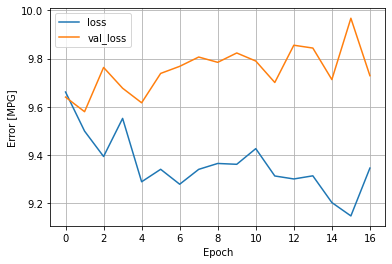

Epoch 1/35
105/105 [==============================] - 10s 76ms/step - loss: 9.4785 - mean_squared_error: 0.1646 - mean_absolute_error: 0.3188 - val_loss: 9.7364 - val_mean_squared_error: 0.1622 - val_mean_absolute_error: 0.3217

Epoch 00001: val_loss did not improve from 9.58020
Epoch 2/35
105/105 [==============================] - 7s 69ms/step - loss: 9.3756 - mean_squared_error: 0.1602 - mean_absolute_error: 0.3149 - val_loss: 9.7350 - val_mean_squared_error: 0.1675 - val_mean_absolute_error: 0.3262

Epoch 00002: val_loss did not improve from 9.58020
Epoch 3/35
105/105 [==============================] - 8s 77ms/step - loss: 9.5932 - mean_squared_error: 0.1670 - mean_absolute_error: 0.3226 - val_loss: 9.8923 - val_mean_squared_error: 0.1664 - val_mean_absolute_error: 0.3277

Epoch 00003: val_loss did not improve from 9.58020
Epoch 4/35
105/105 [==============================] - 9s 82ms/step - loss: 9.2868 - mean_squared_error: 0.1618 - mean_absolute_error: 0.3113 - val_loss: 9.5206 - 

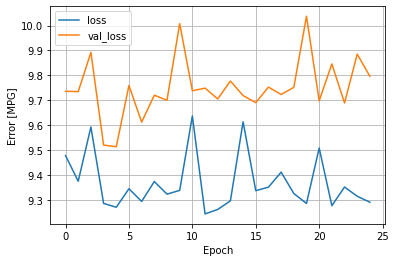

Epoch 1/52
105/105 [==============================] - 3s 11ms/step - loss: 9.3767 - mean_squared_error: 0.1615 - mean_absolute_error: 0.3152 - val_loss: 9.6155 - val_mean_squared_error: 0.1581 - val_mean_absolute_error: 0.3161

Epoch 00001: val_loss did not improve from 9.51400
Epoch 2/52
105/105 [==============================] - 1s 8ms/step - loss: 9.3110 - mean_squared_error: 0.1584 - mean_absolute_error: 0.3122 - val_loss: 10.0192 - val_mean_squared_error: 0.1788 - val_mean_absolute_error: 0.3388

Epoch 00002: val_loss did not improve from 9.51400
Epoch 3/52
105/105 [==============================] - 1s 8ms/step - loss: 9.3825 - mean_squared_error: 0.1606 - mean_absolute_error: 0.3148 - val_loss: 9.8966 - val_mean_squared_error: 0.1663 - val_mean_absolute_error: 0.3284

Epoch 00003: val_loss did not improve from 9.51400
Epoch 4/52
105/105 [==============================] - 1s 8ms/step - loss: 9.4574 - mean_squared_error: 0.1626 - mean_absolute_error: 0.3174 - val_loss: 9.9863 - val

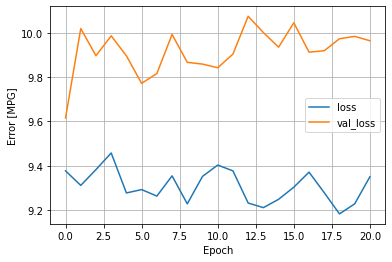

Epoch 1/70
105/105 [==============================] - 3s 11ms/step - loss: 9.2013 - mean_squared_error: 0.1554 - mean_absolute_error: 0.3086 - val_loss: 9.7729 - val_mean_squared_error: 0.1659 - val_mean_absolute_error: 0.3202

Epoch 00001: val_loss did not improve from 9.51400
Epoch 2/70
105/105 [==============================] - 1s 7ms/step - loss: 9.1931 - mean_squared_error: 0.1584 - mean_absolute_error: 0.3082 - val_loss: 9.7274 - val_mean_squared_error: 0.1639 - val_mean_absolute_error: 0.3225

Epoch 00002: val_loss did not improve from 9.51400
Epoch 3/70
105/105 [==============================] - 1s 8ms/step - loss: 9.2474 - mean_squared_error: 0.1575 - mean_absolute_error: 0.3104 - val_loss: 9.6484 - val_mean_squared_error: 0.1642 - val_mean_absolute_error: 0.3189

Epoch 00003: val_loss did not improve from 9.51400
Epoch 4/70
105/105 [==============================] - 1s 13ms/step - loss: 9.1367 - mean_squared_error: 0.1560 - mean_absolute_error: 0.3066 - val_loss: 9.6980 - val

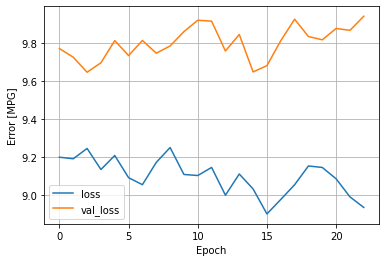

Epoch 1/87
105/105 [==============================] - 4s 17ms/step - loss: 9.0949 - mean_squared_error: 0.1538 - mean_absolute_error: 0.3050 - val_loss: 9.7943 - val_mean_squared_error: 0.1651 - val_mean_absolute_error: 0.3245

Epoch 00001: val_loss did not improve from 9.51400
Epoch 2/87
105/105 [==============================] - 8s 74ms/step - loss: 9.1047 - mean_squared_error: 0.1557 - mean_absolute_error: 0.3060 - val_loss: 9.8061 - val_mean_squared_error: 0.1645 - val_mean_absolute_error: 0.3238

Epoch 00002: val_loss did not improve from 9.51400
Epoch 3/87
105/105 [==============================] - 8s 74ms/step - loss: 9.0110 - mean_squared_error: 0.1507 - mean_absolute_error: 0.3014 - val_loss: 9.9062 - val_mean_squared_error: 0.1654 - val_mean_absolute_error: 0.3278

Epoch 00003: val_loss did not improve from 9.51400
Epoch 4/87
105/105 [==============================] - 8s 73ms/step - loss: 9.0498 - mean_squared_error: 0.1518 - mean_absolute_error: 0.3032 - val_loss: 9.8361 - v

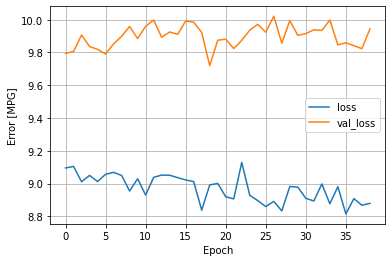

Epoch 1/105
105/105 [==============================] - 3s 14ms/step - loss: 9.0418 - mean_squared_error: 0.1505 - mean_absolute_error: 0.3018 - val_loss: 9.7374 - val_mean_squared_error: 0.1647 - val_mean_absolute_error: 0.3207

Epoch 00001: val_loss did not improve from 9.51400
Epoch 2/105
105/105 [==============================] - 5s 45ms/step - loss: 9.0723 - mean_squared_error: 0.1526 - mean_absolute_error: 0.3037 - val_loss: 9.8140 - val_mean_squared_error: 0.1673 - val_mean_absolute_error: 0.3258

Epoch 00002: val_loss did not improve from 9.51400
Epoch 3/105
105/105 [==============================] - 5s 44ms/step - loss: 8.9829 - mean_squared_error: 0.1515 - mean_absolute_error: 0.3011 - val_loss: 9.9246 - val_mean_squared_error: 0.1685 - val_mean_absolute_error: 0.3279

Epoch 00003: val_loss did not improve from 9.51400
Epoch 4/105
105/105 [==============================] - 5s 44ms/step - loss: 9.0110 - mean_squared_error: 0.1510 - mean_absolute_error: 0.3016 - val_loss: 9.8629

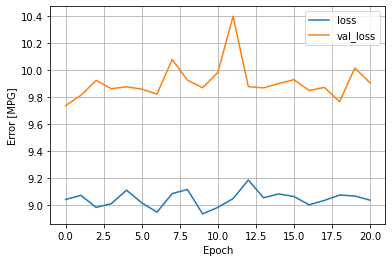

(3336, 736)
(3336, 160)
(3336, 2622)
Epoch 1/17
105/105 [==============================] - 13s 61ms/step - loss: 63.1616 - mean_squared_error: 15.3730 - mean_absolute_error: 3.3191 - val_loss: 59.1253 - val_mean_squared_error: 12.5214 - val_mean_absolute_error: 2.9231

Epoch 00001: val_loss improved from inf to 59.12529, saving model to weights.hdf5
Epoch 2/17
105/105 [==============================] - 4s 41ms/step - loss: 63.1620 - mean_squared_error: 15.3673 - mean_absolute_error: 3.3185 - val_loss: 59.0908 - val_mean_squared_error: 12.5565 - val_mean_absolute_error: 2.9263

Epoch 00002: val_loss improved from 59.12529 to 59.09084, saving model to weights.hdf5
Epoch 3/17
105/105 [==============================] - 5s 49ms/step - loss: 63.1599 - mean_squared_error: 15.3345 - mean_absolute_error: 3.3154 - val_loss: 59.3453 - val_mean_squared_error: 12.2992 - val_mean_absolute_error: 2.9027

Epoch 00003: val_loss did not improve from 59.09084
Epoch 4/17
105/105 [=========================

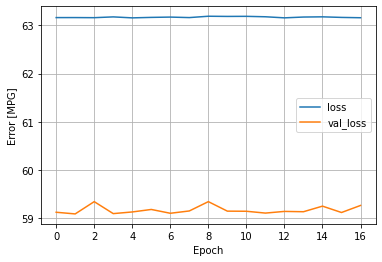

Epoch 1/35
105/105 [==============================] - 13s 63ms/step - loss: 63.1835 - mean_squared_error: 15.3359 - mean_absolute_error: 3.3157 - val_loss: 59.0876 - val_mean_squared_error: 12.5598 - val_mean_absolute_error: 2.9266

Epoch 00001: val_loss improved from 59.09084 to 59.08760, saving model to weights.hdf5
Epoch 2/35
105/105 [==============================] - 2s 15ms/step - loss: 63.1645 - mean_squared_error: 15.3777 - mean_absolute_error: 3.3196 - val_loss: 59.1116 - val_mean_squared_error: 12.5774 - val_mean_absolute_error: 2.9287

Epoch 00002: val_loss did not improve from 59.08760
Epoch 3/35
105/105 [==============================] - 3s 31ms/step - loss: 63.1721 - mean_squared_error: 15.3336 - mean_absolute_error: 3.3154 - val_loss: 59.1390 - val_mean_squared_error: 12.5075 - val_mean_absolute_error: 2.9219

Epoch 00003: val_loss did not improve from 59.08760
Epoch 4/35
105/105 [==============================] - 5s 47ms/step - loss: 63.1626 - mean_squared_error: 15.3666

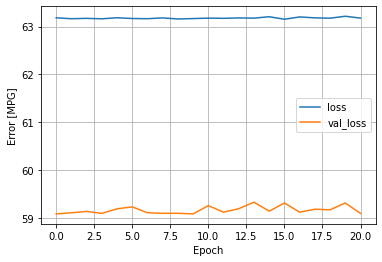

Epoch 1/52
105/105 [==============================] - 9s 23ms/step - loss: 63.1689 - mean_squared_error: 15.3378 - mean_absolute_error: 3.3157 - val_loss: 59.0855 - val_mean_squared_error: 12.5619 - val_mean_absolute_error: 2.9268

Epoch 00001: val_loss improved from 59.08760 to 59.08550, saving model to weights.hdf5
Epoch 2/52
105/105 [==============================] - 1s 12ms/step - loss: 63.1915 - mean_squared_error: 15.3360 - mean_absolute_error: 3.3158 - val_loss: 59.2032 - val_mean_squared_error: 12.4424 - val_mean_absolute_error: 2.9159

Epoch 00002: val_loss did not improve from 59.08550
Epoch 3/52
105/105 [==============================] - 1s 13ms/step - loss: 63.1651 - mean_squared_error: 15.3314 - mean_absolute_error: 3.3151 - val_loss: 59.2377 - val_mean_squared_error: 12.4075 - val_mean_absolute_error: 2.9127

Epoch 00003: val_loss did not improve from 59.08550
Epoch 4/52
105/105 [==============================] - 1s 13ms/step - loss: 63.1747 - mean_squared_error: 15.2800 

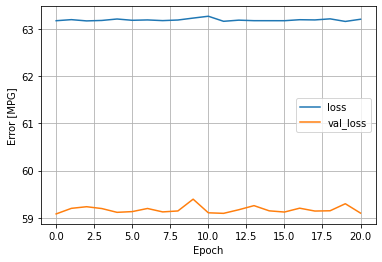

Epoch 1/70
105/105 [==============================] - 12s 56ms/step - loss: 63.1791 - mean_squared_error: 15.3338 - mean_absolute_error: 3.3155 - val_loss: 59.1536 - val_mean_squared_error: 12.4927 - val_mean_absolute_error: 2.9205

Epoch 00001: val_loss did not improve from 59.08550
Epoch 2/70
105/105 [==============================] - 5s 45ms/step - loss: 63.1727 - mean_squared_error: 15.2647 - mean_absolute_error: 3.3088 - val_loss: 59.2679 - val_mean_squared_error: 12.3770 - val_mean_absolute_error: 2.9099

Epoch 00002: val_loss did not improve from 59.08550
Epoch 3/70
105/105 [==============================] - 5s 44ms/step - loss: 63.1848 - mean_squared_error: 15.3342 - mean_absolute_error: 3.3156 - val_loss: 59.1358 - val_mean_squared_error: 12.5108 - val_mean_absolute_error: 2.9222

Epoch 00003: val_loss did not improve from 59.08550
Epoch 4/70
105/105 [==============================] - 5s 50ms/step - loss: 63.1573 - mean_squared_error: 15.3756 - mean_absolute_error: 3.3193 - va

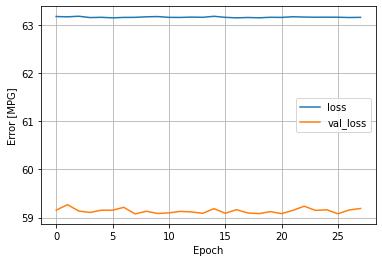

Epoch 1/87
105/105 [==============================] - 8s 22ms/step - loss: 63.1683 - mean_squared_error: 15.3677 - mean_absolute_error: 3.3186 - val_loss: 59.1179 - val_mean_squared_error: 12.5289 - val_mean_absolute_error: 2.9238

Epoch 00001: val_loss did not improve from 59.07557
Epoch 2/87
105/105 [==============================] - 2s 19ms/step - loss: 63.1589 - mean_squared_error: 15.3701 - mean_absolute_error: 3.3188 - val_loss: 59.0985 - val_mean_squared_error: 12.5486 - val_mean_absolute_error: 2.9256

Epoch 00002: val_loss did not improve from 59.07557
Epoch 3/87
105/105 [==============================] - 2s 20ms/step - loss: 63.1756 - mean_squared_error: 15.3596 - mean_absolute_error: 3.3179 - val_loss: 59.1551 - val_mean_squared_error: 12.4911 - val_mean_absolute_error: 2.9204

Epoch 00003: val_loss did not improve from 59.07557
Epoch 4/87
105/105 [==============================] - 2s 21ms/step - loss: 63.1628 - mean_squared_error: 15.3613 - mean_absolute_error: 3.3180 - val

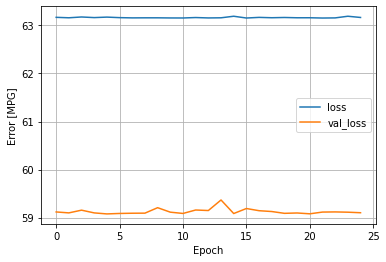

Epoch 1/105
105/105 [==============================] - 9s 23ms/step - loss: 63.1632 - mean_squared_error: 15.3166 - mean_absolute_error: 3.3137 - val_loss: 59.1623 - val_mean_squared_error: 12.4838 - val_mean_absolute_error: 2.9197

Epoch 00001: val_loss did not improve from 59.07557
Epoch 2/105
105/105 [==============================] - 1s 13ms/step - loss: 63.1766 - mean_squared_error: 15.3339 - mean_absolute_error: 3.3155 - val_loss: 59.1849 - val_mean_squared_error: 12.4609 - val_mean_absolute_error: 2.9176

Epoch 00002: val_loss did not improve from 59.07557
Epoch 3/105
105/105 [==============================] - 1s 13ms/step - loss: 63.1807 - mean_squared_error: 15.3232 - mean_absolute_error: 3.3145 - val_loss: 59.0863 - val_mean_squared_error: 12.5611 - val_mean_absolute_error: 2.9268

Epoch 00003: val_loss did not improve from 59.07557
Epoch 4/105
105/105 [==============================] - 1s 13ms/step - loss: 63.1704 - mean_squared_error: 15.3396 - mean_absolute_error: 3.3161 -

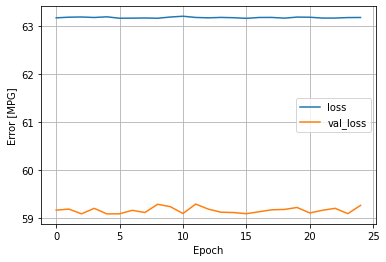

(3336, 736)
(3336, 160)
(3336, 2622)
Epoch 1/17
105/105 [==============================] - 10s 24ms/step - loss: 43.9260 - mean_squared_error: 2.5321 - mean_absolute_error: 1.1942 - val_loss: 48.5716 - val_mean_squared_error: 2.7411 - val_mean_absolute_error: 1.2409

Epoch 00001: val_loss improved from inf to 48.57165, saving model to weights.hdf5
Epoch 2/17
105/105 [==============================] - 1s 14ms/step - loss: 43.9199 - mean_squared_error: 2.5333 - mean_absolute_error: 1.1948 - val_loss: 48.5915 - val_mean_squared_error: 2.7494 - val_mean_absolute_error: 1.2483

Epoch 00002: val_loss did not improve from 48.57165
Epoch 3/17
105/105 [==============================] - 1s 13ms/step - loss: 43.9386 - mean_squared_error: 2.5353 - mean_absolute_error: 1.1965 - val_loss: 48.5680 - val_mean_squared_error: 2.7396 - val_mean_absolute_error: 1.2396

Epoch 00003: val_loss improved from 48.57165 to 48.56796, saving model to weights.hdf5
Epoch 4/17
105/105 [==============================]

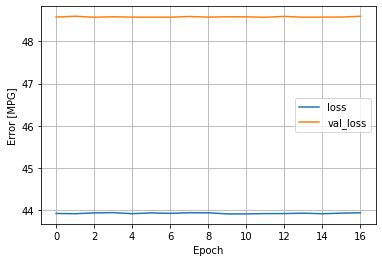

Epoch 1/35
105/105 [==============================] - 9s 25ms/step - loss: 43.9384 - mean_squared_error: 2.5342 - mean_absolute_error: 1.1957 - val_loss: 48.5817 - val_mean_squared_error: 2.7383 - val_mean_absolute_error: 1.2390

Epoch 00001: val_loss did not improve from 48.56745
Epoch 2/35
105/105 [==============================] - 1s 14ms/step - loss: 43.9227 - mean_squared_error: 2.5326 - mean_absolute_error: 1.1940 - val_loss: 48.5697 - val_mean_squared_error: 2.7403 - val_mean_absolute_error: 1.2402

Epoch 00002: val_loss did not improve from 48.56745
Epoch 3/35
105/105 [==============================] - 2s 15ms/step - loss: 43.9250 - mean_squared_error: 2.5333 - mean_absolute_error: 1.1950 - val_loss: 48.5967 - val_mean_squared_error: 2.7516 - val_mean_absolute_error: 1.2502

Epoch 00003: val_loss did not improve from 48.56745
Epoch 4/35
105/105 [==============================] - 3s 26ms/step - loss: 43.9314 - mean_squared_error: 2.5349 - mean_absolute_error: 1.1957 - val_loss: 

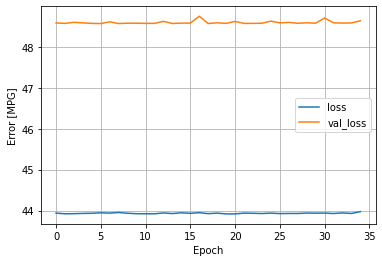

Epoch 1/52
105/105 [==============================] - 10s 30ms/step - loss: 43.9474 - mean_squared_error: 2.5364 - mean_absolute_error: 1.1977 - val_loss: 48.5784 - val_mean_squared_error: 2.7439 - val_mean_absolute_error: 1.2434

Epoch 00001: val_loss did not improve from 48.56647
Epoch 2/52
105/105 [==============================] - 2s 20ms/step - loss: 43.9375 - mean_squared_error: 2.5363 - mean_absolute_error: 1.1970 - val_loss: 48.5794 - val_mean_squared_error: 2.7443 - val_mean_absolute_error: 1.2438

Epoch 00002: val_loss did not improve from 48.56647
Epoch 3/52
105/105 [==============================] - 2s 20ms/step - loss: 43.9400 - mean_squared_error: 2.5354 - mean_absolute_error: 1.1963 - val_loss: 48.5671 - val_mean_squared_error: 2.7393 - val_mean_absolute_error: 1.2392

Epoch 00003: val_loss did not improve from 48.56647
Epoch 4/52
105/105 [==============================] - 2s 20ms/step - loss: 43.9180 - mean_squared_error: 2.5326 - mean_absolute_error: 1.1940 - val_loss:

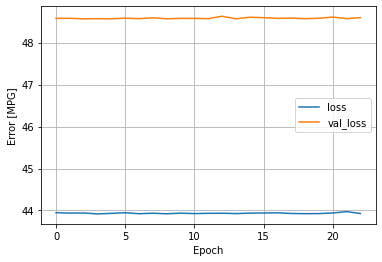

Epoch 1/70
105/105 [==============================] - 10s 25ms/step - loss: 43.9234 - mean_squared_error: 2.5331 - mean_absolute_error: 1.1947 - val_loss: 48.5688 - val_mean_squared_error: 2.7400 - val_mean_absolute_error: 1.2399

Epoch 00001: val_loss did not improve from 48.56647
Epoch 2/70
105/105 [==============================] - 2s 16ms/step - loss: 43.9243 - mean_squared_error: 2.5328 - mean_absolute_error: 1.1943 - val_loss: 48.5688 - val_mean_squared_error: 2.7400 - val_mean_absolute_error: 1.2399

Epoch 00002: val_loss did not improve from 48.56647
Epoch 3/70
105/105 [==============================] - 2s 16ms/step - loss: 43.9159 - mean_squared_error: 2.5316 - mean_absolute_error: 1.1933 - val_loss: 48.5670 - val_mean_squared_error: 2.7392 - val_mean_absolute_error: 1.2392

Epoch 00003: val_loss did not improve from 48.56647
Epoch 4/70
105/105 [==============================] - 2s 15ms/step - loss: 43.9165 - mean_squared_error: 2.5317 - mean_absolute_error: 1.1932 - val_loss:

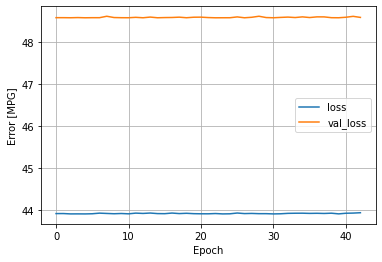

Epoch 1/87
105/105 [==============================] - 10s 29ms/step - loss: 43.9239 - mean_squared_error: 2.5322 - mean_absolute_error: 1.1940 - val_loss: 48.5830 - val_mean_squared_error: 2.7458 - val_mean_absolute_error: 1.2451

Epoch 00001: val_loss did not improve from 48.56616
Epoch 2/87
105/105 [==============================] - 2s 19ms/step - loss: 43.9301 - mean_squared_error: 2.5333 - mean_absolute_error: 1.1950 - val_loss: 48.5826 - val_mean_squared_error: 2.7456 - val_mean_absolute_error: 1.2450

Epoch 00002: val_loss did not improve from 48.56616
Epoch 3/87
105/105 [==============================] - 2s 18ms/step - loss: 43.9247 - mean_squared_error: 2.5324 - mean_absolute_error: 1.1938 - val_loss: 48.5708 - val_mean_squared_error: 2.7408 - val_mean_absolute_error: 1.2406

Epoch 00003: val_loss did not improve from 48.56616
Epoch 4/87
105/105 [==============================] - 2s 19ms/step - loss: 43.9121 - mean_squared_error: 2.5311 - mean_absolute_error: 1.1929 - val_loss:

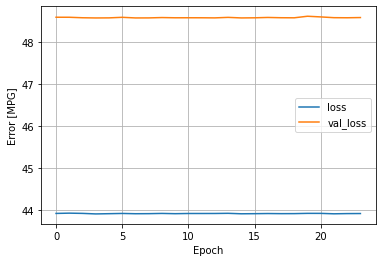

Epoch 1/105
105/105 [==============================] - 10s 28ms/step - loss: 43.9311 - mean_squared_error: 2.5353 - mean_absolute_error: 1.1970 - val_loss: 48.5780 - val_mean_squared_error: 2.7437 - val_mean_absolute_error: 1.2433

Epoch 00001: val_loss did not improve from 48.56616
Epoch 2/105
105/105 [==============================] - 2s 19ms/step - loss: 43.9423 - mean_squared_error: 2.5369 - mean_absolute_error: 1.1972 - val_loss: 48.5682 - val_mean_squared_error: 2.7397 - val_mean_absolute_error: 1.2397

Epoch 00002: val_loss did not improve from 48.56616
Epoch 3/105
105/105 [==============================] - 2s 20ms/step - loss: 43.9155 - mean_squared_error: 2.5318 - mean_absolute_error: 1.1933 - val_loss: 48.5672 - val_mean_squared_error: 2.7388 - val_mean_absolute_error: 1.2389

Epoch 00003: val_loss did not improve from 48.56616
Epoch 4/105
105/105 [==============================] - 2s 19ms/step - loss: 43.9168 - mean_squared_error: 2.5314 - mean_absolute_error: 1.1931 - val_l

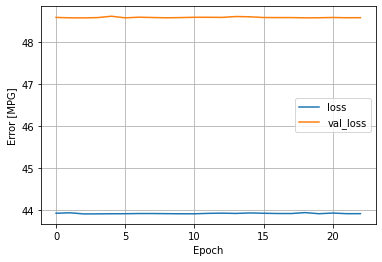

(3336, 736)
(3336, 160)
(3336, 2622)
Epoch 1/17
105/105 [==============================] - 11s 26ms/step - loss: 52.4541 - mean_squared_error: 8.4093 - mean_absolute_error: 2.4093 - val_loss: 49.0250 - val_mean_squared_error: 6.9939 - val_mean_absolute_error: 2.1860

Epoch 00001: val_loss improved from inf to 49.02501, saving model to weights.hdf5
Epoch 2/17
105/105 [==============================] - 2s 15ms/step - loss: 46.9710 - mean_squared_error: 6.0864 - mean_absolute_error: 2.0267 - val_loss: 47.1973 - val_mean_squared_error: 5.5904 - val_mean_absolute_error: 1.9564

Epoch 00002: val_loss improved from 49.02501 to 47.19729, saving model to weights.hdf5
Epoch 3/17
105/105 [==============================] - 2s 15ms/step - loss: 46.0602 - mean_squared_error: 5.2931 - mean_absolute_error: 1.8924 - val_loss: 46.9557 - val_mean_squared_error: 5.2113 - val_mean_absolute_error: 1.8918

Epoch 00003: val_loss improved from 47.19729 to 46.95567, saving model to weights.hdf5
Epoch 4/17
105/1

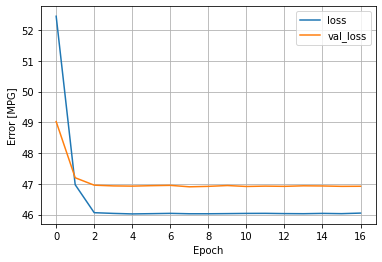

Epoch 1/35
105/105 [==============================] - 10s 26ms/step - loss: 46.0267 - mean_squared_error: 5.0119 - mean_absolute_error: 1.8469 - val_loss: 46.9534 - val_mean_squared_error: 5.2072 - val_mean_absolute_error: 1.8910

Epoch 00001: val_loss did not improve from 46.90287
Epoch 2/35
105/105 [==============================] - 2s 15ms/step - loss: 46.0535 - mean_squared_error: 5.1760 - mean_absolute_error: 1.8734 - val_loss: 46.9727 - val_mean_squared_error: 5.2424 - val_mean_absolute_error: 1.8972

Epoch 00002: val_loss did not improve from 46.90287
Epoch 3/35
105/105 [==============================] - 2s 15ms/step - loss: 46.0289 - mean_squared_error: 5.0494 - mean_absolute_error: 1.8529 - val_loss: 46.9303 - val_mean_squared_error: 5.1540 - val_mean_absolute_error: 1.8818

Epoch 00003: val_loss did not improve from 46.90287
Epoch 4/35
105/105 [==============================] - 2s 15ms/step - loss: 46.0671 - mean_squared_error: 5.0788 - mean_absolute_error: 1.8578 - val_loss:

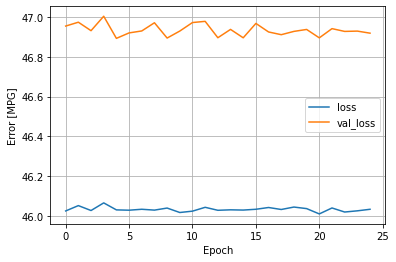

Epoch 1/52
105/105 [==============================] - 11s 30ms/step - loss: 46.0529 - mean_squared_error: 5.0522 - mean_absolute_error: 1.8537 - val_loss: 46.9109 - val_mean_squared_error: 5.0958 - val_mean_absolute_error: 1.8718

Epoch 00001: val_loss did not improve from 46.89174
Epoch 2/52
105/105 [==============================] - 2s 19ms/step - loss: 46.0593 - mean_squared_error: 5.0480 - mean_absolute_error: 1.8530 - val_loss: 46.9345 - val_mean_squared_error: 5.1644 - val_mean_absolute_error: 1.8836

Epoch 00002: val_loss did not improve from 46.89174
Epoch 3/52
105/105 [==============================] - 2s 18ms/step - loss: 46.0247 - mean_squared_error: 5.1288 - mean_absolute_error: 1.8658 - val_loss: 46.9247 - val_mean_squared_error: 5.1404 - val_mean_absolute_error: 1.8795

Epoch 00003: val_loss did not improve from 46.89174
Epoch 4/52
105/105 [==============================] - 2s 19ms/step - loss: 46.0415 - mean_squared_error: 5.0970 - mean_absolute_error: 1.8602 - val_loss:

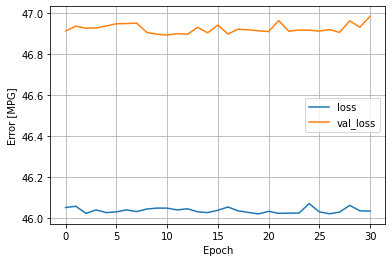

Epoch 1/70
105/105 [==============================] - 11s 27ms/step - loss: 46.0375 - mean_squared_error: 5.0357 - mean_absolute_error: 1.8508 - val_loss: 46.9068 - val_mean_squared_error: 5.0801 - val_mean_absolute_error: 1.8691

Epoch 00001: val_loss did not improve from 46.89128
Epoch 2/70
105/105 [==============================] - 2s 19ms/step - loss: 46.0232 - mean_squared_error: 4.9529 - mean_absolute_error: 1.8372 - val_loss: 46.9116 - val_mean_squared_error: 5.0981 - val_mean_absolute_error: 1.8722

Epoch 00002: val_loss did not improve from 46.89128
Epoch 3/70
105/105 [==============================] - 2s 18ms/step - loss: 46.0241 - mean_squared_error: 5.1407 - mean_absolute_error: 1.8678 - val_loss: 46.9329 - val_mean_squared_error: 5.1604 - val_mean_absolute_error: 1.8829

Epoch 00003: val_loss did not improve from 46.89128
Epoch 4/70
105/105 [==============================] - 2s 19ms/step - loss: 46.0404 - mean_squared_error: 4.9482 - mean_absolute_error: 1.8365 - val_loss:

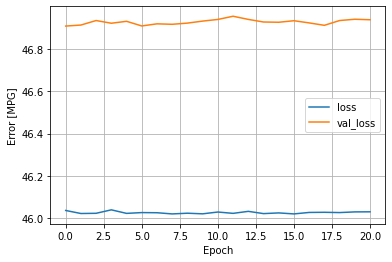

Epoch 1/87
105/105 [==============================] - 13s 27ms/step - loss: 46.0322 - mean_squared_error: 5.0919 - mean_absolute_error: 1.8599 - val_loss: 46.9226 - val_mean_squared_error: 5.1353 - val_mean_absolute_error: 1.8786

Epoch 00001: val_loss did not improve from 46.89128
Epoch 2/87
105/105 [==============================] - 2s 15ms/step - loss: 46.0249 - mean_squared_error: 5.1057 - mean_absolute_error: 1.8621 - val_loss: 46.9100 - val_mean_squared_error: 5.0923 - val_mean_absolute_error: 1.8712

Epoch 00002: val_loss did not improve from 46.89128
Epoch 3/87
105/105 [==============================] - 2s 15ms/step - loss: 46.0373 - mean_squared_error: 5.0987 - mean_absolute_error: 1.8611 - val_loss: 46.9463 - val_mean_squared_error: 5.1934 - val_mean_absolute_error: 1.8886

Epoch 00003: val_loss did not improve from 46.89128
Epoch 4/87
105/105 [==============================] - 2s 15ms/step - loss: 46.0211 - mean_squared_error: 5.0845 - mean_absolute_error: 1.8586 - val_loss:

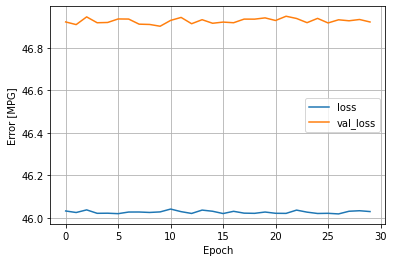

Epoch 1/105
105/105 [==============================] - 11s 27ms/step - loss: 46.0289 - mean_squared_error: 5.1481 - mean_absolute_error: 1.8688 - val_loss: 46.9183 - val_mean_squared_error: 5.1236 - val_mean_absolute_error: 1.8766

Epoch 00001: val_loss did not improve from 46.89128
Epoch 2/105
105/105 [==============================] - 2s 15ms/step - loss: 46.0404 - mean_squared_error: 4.9724 - mean_absolute_error: 1.8405 - val_loss: 46.9283 - val_mean_squared_error: 5.1492 - val_mean_absolute_error: 1.8810

Epoch 00002: val_loss did not improve from 46.89128
Epoch 3/105
105/105 [==============================] - 2s 15ms/step - loss: 46.0243 - mean_squared_error: 5.0775 - mean_absolute_error: 1.8576 - val_loss: 46.9453 - val_mean_squared_error: 5.1909 - val_mean_absolute_error: 1.8882

Epoch 00003: val_loss did not improve from 46.89128
Epoch 4/105
105/105 [==============================] - 2s 15ms/step - loss: 46.0350 - mean_squared_error: 5.1294 - mean_absolute_error: 1.8660 - val_l

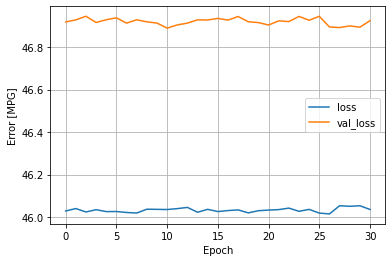

In [ ]:
pairs=  getLabelsForTarget(targetColumn)
is_classification=isClassificationDict[targetColumn]

if(is_classification):
  targetMetric="val_accuracy"
  fun=max
  compareFunction=biggerThan
  initBestPerformance=0
  otherMetricts=[]

else: 
  targetMetric="val_loss"
  fun=min
  compareFunction=lessThan
  initBestPerformance=1000000
  otherMetricts= ["mean_squared_error", "mean_absolute_error", "val_mean_squared_error", "val_mean_absolute_error"]

print(targetMetric)

filename= "/content/drive/MyDrive/"+ targetColumn+"_finalResults.txt"
with open(filename, "w") as file_object:
  file_object.write("This is the first line\n")

for pair, nameOfPair in zip(pairs,namesOfPairs ):

  y_train, y_test= pair
  model = keras.models.load_model('/content/drive/MyDrive/BestModels/'+targetColumn+ "_"+nameOfPair)

  x_train_dic={}
  x_test_dic={}
  keyNames=["title","body", "tags" ]

  x_train_dic["title"]=readEmbeding(df,[nameToCutNameDict[meTiSira[0]]])
  x_test_dic["title"]=readEmbeding(test_df,[nameToCutNameDict[meTiSira[0]]])

  x_train_dic["body"]=readEmbeding(df,[nameToCutNameDict[meTiSira[1]]])
  x_test_dic["body"]=readEmbeding(test_df,[nameToCutNameDict[meTiSira[1]]])

  x_train_dic["tags"]=readEmbeding(df,[nameToCutNameDict[meTiSira[2]]])
  x_test_dic["tags"]=readEmbeding(test_df,[nameToCutNameDict[meTiSira[2]]])


  for key, value in x_train_dic.items():
    print(x_train_dic[key].shape)
  model.compile(
      optimizer="adam",
      loss= tf.keras.losses.MeanAbsolutePercentageError(),
      metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ]
  )

  #you need to see this again.
  allhistory= trainWithLearningRateDecay( model, x_train_dic, y_train, x_test_dic,y_test, 
                            init_learning_rate=0.1, numberEpochsPerIteration=35,
                            numberOfIterations=6, patience=20, is_classification=is_classification, 
                            returnBestModel=True, otherMetricts=otherMetricts )
  
  model.save('/content/drive/MyDrive/BestModels/'+targetColumn+ "_"+nameOfPair)
  with open(filename, "a") as file_object:
    file_object.write(nameOfPair+" \n")
    for key, value in allhistory.items():
      file_object.write(key+ " ---> " + str(fun(allhistory[key]))+ "\n")



In [ ]:
print("Done")

Done


In [ ]:
classifiers = buildClassifiers(trainDF=df , task=targetColumn, modelDic=modelDic, y_train= y_train)

training with embedings for model : facenet
(3336, 128)
(180, 128)
Epoch 1/10
105/105 [==============================] - 3s 12ms/step - loss: 44.6353 - mean_squared_error: 5.4254 - mean_absolute_error: 1.4633 - val_loss: 31.3753 - val_mean_squared_error: 1.2780 - val_mean_absolute_error: 1.0376

Epoch 00001: val_loss improved from inf to 31.37528, saving model to weights.hdf5
Epoch 2/10
105/105 [==============================] - 1s 10ms/step - loss: 30.0831 - mean_squared_error: 1.4760 - mean_absolute_error: 0.9710 - val_loss: 27.7714 - val_mean_squared_error: 1.0120 - val_mean_absolute_error: 0.9098

Epoch 00002: val_loss improved from 31.37528 to 27.77136, saving model to weights.hdf5
Epoch 3/10
105/105 [==============================] - 1s 10ms/step - loss: 24.7369 - mean_squared_error: 0.9855 - mean_absolute_error: 0.7866 - val_loss: 17.5956 - val_mean_squared_error: 0.4093 - val_mean_absolute_error: 0.5494

Epoch 00003: val_loss improved from 27.77136 to 17.59561, saving model to 

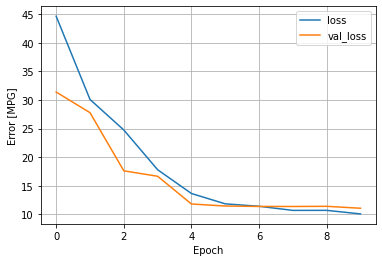

Epoch 1/20
105/105 [==============================] - 3s 20ms/step - loss: 12.6676 - mean_squared_error: 0.2172 - mean_absolute_error: 0.3665 - val_loss: 11.8271 - val_mean_squared_error: 0.1672 - val_mean_absolute_error: 0.3288

Epoch 00001: val_loss did not improve from 11.05093
Epoch 2/20
105/105 [==============================] - 2s 19ms/step - loss: 11.7907 - mean_squared_error: 0.1792 - mean_absolute_error: 0.3416 - val_loss: 11.3679 - val_mean_squared_error: 0.1663 - val_mean_absolute_error: 0.3281

Epoch 00002: val_loss did not improve from 11.05093
Epoch 3/20
105/105 [==============================] - 2s 20ms/step - loss: 11.5672 - mean_squared_error: 0.1999 - mean_absolute_error: 0.3439 - val_loss: 11.1006 - val_mean_squared_error: 0.1699 - val_mean_absolute_error: 0.3317

Epoch 00003: val_loss did not improve from 11.05093
Epoch 4/20
105/105 [==============================] - 3s 27ms/step - loss: 11.2354 - mean_squared_error: 0.1790 - mean_absolute_error: 0.3414 - val_loss: 

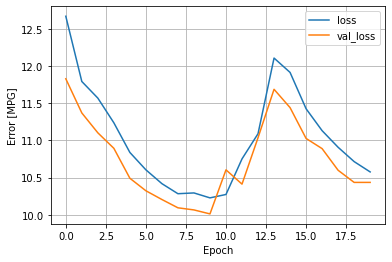

Epoch 1/30
105/105 [==============================] - 2s 14ms/step - loss: 10.9518 - mean_squared_error: 0.2023 - mean_absolute_error: 0.3568 - val_loss: 10.3421 - val_mean_squared_error: 0.1665 - val_mean_absolute_error: 0.3282

Epoch 00001: val_loss did not improve from 10.01055
Epoch 2/30
105/105 [==============================] - 1s 12ms/step - loss: 10.4733 - mean_squared_error: 0.1776 - mean_absolute_error: 0.3404 - val_loss: 10.2601 - val_mean_squared_error: 0.1715 - val_mean_absolute_error: 0.3333

Epoch 00002: val_loss did not improve from 10.01055
Epoch 3/30
105/105 [==============================] - 1s 13ms/step - loss: 10.4333 - mean_squared_error: 0.1788 - mean_absolute_error: 0.3415 - val_loss: 10.2434 - val_mean_squared_error: 0.1708 - val_mean_absolute_error: 0.3326

Epoch 00003: val_loss did not improve from 10.01055
Epoch 4/30
105/105 [==============================] - 1s 12ms/step - loss: 10.5015 - mean_squared_error: 0.1821 - mean_absolute_error: 0.3426 - val_loss: 

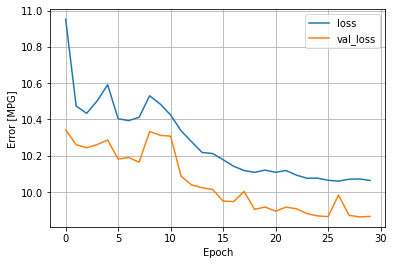

Epoch 1/40
105/105 [==============================] - 2s 13ms/step - loss: 9.8425 - mean_squared_error: 0.1702 - mean_absolute_error: 0.3330 - val_loss: 9.4527 - val_mean_squared_error: 0.1530 - val_mean_absolute_error: 0.3124

Epoch 00001: val_loss improved from 9.86196 to 9.45266, saving model to weights.hdf5
Epoch 2/40
105/105 [==============================] - 1s 10ms/step - loss: 9.4181 - mean_squared_error: 0.1591 - mean_absolute_error: 0.3186 - val_loss: 9.5371 - val_mean_squared_error: 0.1537 - val_mean_absolute_error: 0.3135

Epoch 00002: val_loss did not improve from 9.45266
Epoch 3/40
105/105 [==============================] - 1s 10ms/step - loss: 9.2118 - mean_squared_error: 0.1521 - mean_absolute_error: 0.3101 - val_loss: 9.3772 - val_mean_squared_error: 0.1474 - val_mean_absolute_error: 0.3083

Epoch 00003: val_loss improved from 9.45266 to 9.37717, saving model to weights.hdf5
Epoch 4/40
105/105 [==============================] - 1s 11ms/step - loss: 9.2148 - mean_square

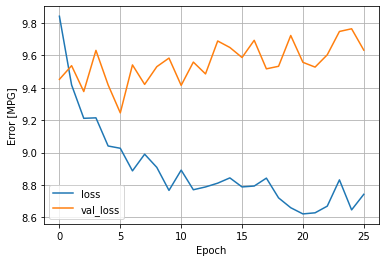

Epoch 1/50
105/105 [==============================] - 2s 12ms/step - loss: 9.0298 - mean_squared_error: 0.1462 - mean_absolute_error: 0.3006 - val_loss: 9.3784 - val_mean_squared_error: 0.1456 - val_mean_absolute_error: 0.3084

Epoch 00001: val_loss did not improve from 9.24546
Epoch 2/50
105/105 [==============================] - 1s 11ms/step - loss: 8.5846 - mean_squared_error: 0.1341 - mean_absolute_error: 0.2877 - val_loss: 9.5253 - val_mean_squared_error: 0.1509 - val_mean_absolute_error: 0.3118

Epoch 00002: val_loss did not improve from 9.24546
Epoch 3/50
105/105 [==============================] - 1s 10ms/step - loss: 8.7322 - mean_squared_error: 0.1392 - mean_absolute_error: 0.2912 - val_loss: 9.5074 - val_mean_squared_error: 0.1528 - val_mean_absolute_error: 0.3153

Epoch 00003: val_loss did not improve from 9.24546
Epoch 4/50
105/105 [==============================] - 1s 10ms/step - loss: 8.4372 - mean_squared_error: 0.1289 - mean_absolute_error: 0.2814 - val_loss: 9.5315 - v

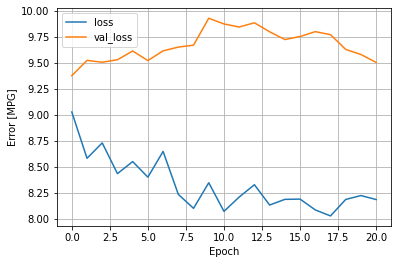

training with embedings for model : deepID
(3336, 160)
(180, 160)
Epoch 1/10
105/105 [==============================] - 5s 40ms/step - loss: 87.5203 - mean_squared_error: 9.2767 - mean_absolute_error: 2.9745 - val_loss: 72.5489 - val_mean_squared_error: 6.1823 - val_mean_absolute_error: 2.4528

Epoch 00001: val_loss improved from inf to 72.54893, saving model to weights.hdf5
Epoch 2/10
105/105 [==============================] - 4s 38ms/step - loss: 58.7617 - mean_squared_error: 4.2741 - mean_absolute_error: 2.0062 - val_loss: 43.9576 - val_mean_squared_error: 2.4045 - val_mean_absolute_error: 1.4961

Epoch 00002: val_loss improved from 72.54893 to 43.95762, saving model to weights.hdf5
Epoch 3/10
105/105 [==============================] - 4s 34ms/step - loss: 30.7762 - mean_squared_error: 1.3566 - mean_absolute_error: 1.0606 - val_loss: 17.5237 - val_mean_squared_error: 0.4900 - val_mean_absolute_error: 0.6001

Epoch 00003: val_loss improved from 43.95762 to 17.52372, saving model to w

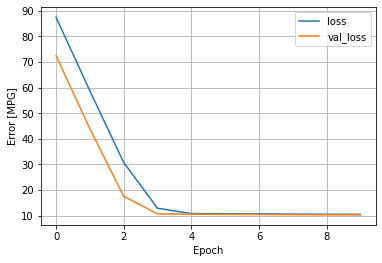

Epoch 1/20
105/105 [==============================] - 5s 40ms/step - loss: 10.0734 - mean_squared_error: 0.1774 - mean_absolute_error: 0.3405 - val_loss: 9.8816 - val_mean_squared_error: 0.1665 - val_mean_absolute_error: 0.3281

Epoch 00001: val_loss improved from 10.24575 to 9.88165, saving model to weights.hdf5
Epoch 2/20
105/105 [==============================] - 3s 29ms/step - loss: 10.0423 - mean_squared_error: 0.1771 - mean_absolute_error: 0.3400 - val_loss: 9.8433 - val_mean_squared_error: 0.1682 - val_mean_absolute_error: 0.3298

Epoch 00002: val_loss improved from 9.88165 to 9.84334, saving model to weights.hdf5
Epoch 3/20
105/105 [==============================] - 4s 37ms/step - loss: 10.0769 - mean_squared_error: 0.1785 - mean_absolute_error: 0.3421 - val_loss: 9.8655 - val_mean_squared_error: 0.1715 - val_mean_absolute_error: 0.3333

Epoch 00003: val_loss did not improve from 9.84334
Epoch 4/20
105/105 [==============================] - 4s 36ms/step - loss: 10.0573 - mean_s

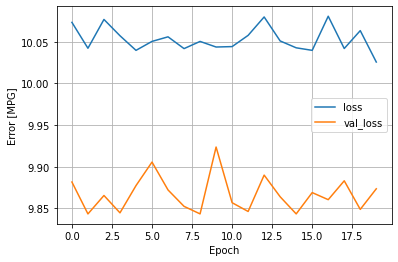

Epoch 1/30
105/105 [==============================] - 5s 43ms/step - loss: 10.0571 - mean_squared_error: 0.1772 - mean_absolute_error: 0.3406 - val_loss: 9.8435 - val_mean_squared_error: 0.1686 - val_mean_absolute_error: 0.3302

Epoch 00001: val_loss did not improve from 9.84334
Epoch 2/30
105/105 [==============================] - 4s 36ms/step - loss: 10.0413 - mean_squared_error: 0.1782 - mean_absolute_error: 0.3412 - val_loss: 9.8822 - val_mean_squared_error: 0.1664 - val_mean_absolute_error: 0.3281

Epoch 00002: val_loss did not improve from 9.84334
Epoch 3/30
105/105 [==============================] - 4s 39ms/step - loss: 10.0532 - mean_squared_error: 0.1774 - mean_absolute_error: 0.3401 - val_loss: 9.8439 - val_mean_squared_error: 0.1688 - val_mean_absolute_error: 0.3304

Epoch 00003: val_loss did not improve from 9.84334
Epoch 4/30
105/105 [==============================] - 4s 39ms/step - loss: 10.0457 - mean_squared_error: 0.1768 - mean_absolute_error: 0.3402 - val_loss: 9.8450

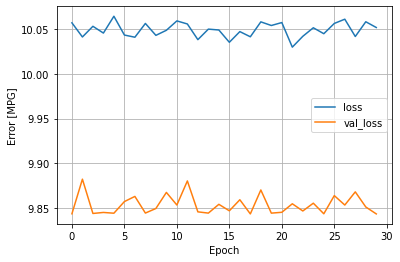

Epoch 1/40
105/105 [==============================] - 5s 39ms/step - loss: 10.0296 - mean_squared_error: 0.1761 - mean_absolute_error: 0.3391 - val_loss: 9.8718 - val_mean_squared_error: 0.1725 - val_mean_absolute_error: 0.3341

Epoch 00001: val_loss did not improve from 9.84334
Epoch 2/40
105/105 [==============================] - 3s 29ms/step - loss: 10.0445 - mean_squared_error: 0.1786 - mean_absolute_error: 0.3413 - val_loss: 9.8456 - val_mean_squared_error: 0.1677 - val_mean_absolute_error: 0.3293

Epoch 00002: val_loss did not improve from 9.84334
Epoch 3/40
105/105 [==============================] - 4s 35ms/step - loss: 10.0361 - mean_squared_error: 0.1770 - mean_absolute_error: 0.3401 - val_loss: 9.8434 - val_mean_squared_error: 0.1680 - val_mean_absolute_error: 0.3296

Epoch 00003: val_loss did not improve from 9.84334
Epoch 4/40
105/105 [==============================] - 3s 28ms/step - loss: 10.0410 - mean_squared_error: 0.1782 - mean_absolute_error: 0.3412 - val_loss: 9.8609

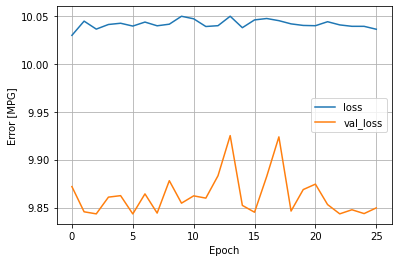

Epoch 1/50
105/105 [==============================] - 2s 12ms/step - loss: 10.0469 - mean_squared_error: 0.1769 - mean_absolute_error: 0.3404 - val_loss: 9.8442 - val_mean_squared_error: 0.1679 - val_mean_absolute_error: 0.3295

Epoch 00001: val_loss did not improve from 9.84334
Epoch 2/50
105/105 [==============================] - 1s 11ms/step - loss: 10.0481 - mean_squared_error: 0.1765 - mean_absolute_error: 0.3400 - val_loss: 9.8456 - val_mean_squared_error: 0.1677 - val_mean_absolute_error: 0.3293

Epoch 00002: val_loss did not improve from 9.84334
Epoch 3/50
105/105 [==============================] - 1s 11ms/step - loss: 10.0408 - mean_squared_error: 0.1776 - mean_absolute_error: 0.3405 - val_loss: 9.8474 - val_mean_squared_error: 0.1675 - val_mean_absolute_error: 0.3291

Epoch 00003: val_loss did not improve from 9.84334
Epoch 4/50
105/105 [==============================] - 1s 11ms/step - loss: 10.0335 - mean_squared_error: 0.1757 - mean_absolute_error: 0.3392 - val_loss: 9.8782

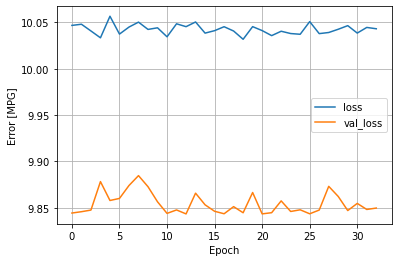

training with embedings for model : vggface
(3336, 2622)
(180, 2622)
Epoch 1/10
105/105 [==============================] - 2s 13ms/step - loss: 171.7433 - mean_squared_error: 4.9127 - mean_absolute_error: 1.6982 - val_loss: 54.9626 - val_mean_squared_error: 1.6008 - val_mean_absolute_error: 0.8912

Epoch 00001: val_loss improved from inf to 54.96259, saving model to weights.hdf5
Epoch 2/10
105/105 [==============================] - 1s 12ms/step - loss: 51.4407 - mean_squared_error: 1.8686 - mean_absolute_error: 1.1074 - val_loss: 34.7573 - val_mean_squared_error: 0.7077 - val_mean_absolute_error: 0.7266

Epoch 00002: val_loss improved from 54.96259 to 34.75730, saving model to weights.hdf5
Epoch 3/10
105/105 [==============================] - 1s 12ms/step - loss: 30.5575 - mean_squared_error: 0.7572 - mean_absolute_error: 0.6998 - val_loss: 17.7576 - val_mean_squared_error: 0.2139 - val_mean_absolute_error: 0.3721

Epoch 00003: val_loss improved from 34.75730 to 17.75764, saving model 

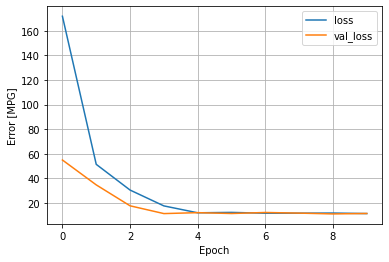

Epoch 1/20
105/105 [==============================] - 2s 14ms/step - loss: 15.6900 - mean_squared_error: 0.1802 - mean_absolute_error: 0.3408 - val_loss: 10.2100 - val_mean_squared_error: 0.1803 - val_mean_absolute_error: 0.3409

Epoch 00001: val_loss improved from 11.17104 to 10.21003, saving model to weights.hdf5
Epoch 2/20
105/105 [==============================] - 1s 13ms/step - loss: 10.1638 - mean_squared_error: 0.1787 - mean_absolute_error: 0.3412 - val_loss: 9.9788 - val_mean_squared_error: 0.1701 - val_mean_absolute_error: 0.3319

Epoch 00002: val_loss improved from 10.21003 to 9.97878, saving model to weights.hdf5
Epoch 3/20
105/105 [==============================] - 1s 13ms/step - loss: 10.1846 - mean_squared_error: 0.1783 - mean_absolute_error: 0.3412 - val_loss: 9.9071 - val_mean_squared_error: 0.1706 - val_mean_absolute_error: 0.3324

Epoch 00003: val_loss improved from 9.97878 to 9.90713, saving model to weights.hdf5
Epoch 4/20
105/105 [==============================] - 

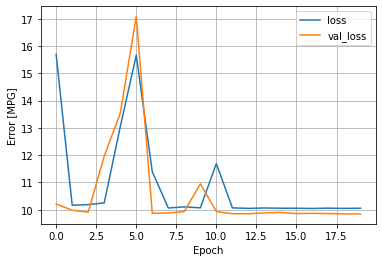

Epoch 1/30
105/105 [==============================] - 4s 27ms/step - loss: 10.3837 - mean_squared_error: 0.1772 - mean_absolute_error: 0.3402 - val_loss: 9.9083 - val_mean_squared_error: 0.1701 - val_mean_absolute_error: 0.3319

Epoch 00001: val_loss did not improve from 9.84417
Epoch 2/30
105/105 [==============================] - 3s 24ms/step - loss: 10.0808 - mean_squared_error: 0.1791 - mean_absolute_error: 0.3418 - val_loss: 9.9727 - val_mean_squared_error: 0.1663 - val_mean_absolute_error: 0.3283

Epoch 00002: val_loss did not improve from 9.84417
Epoch 3/30
105/105 [==============================] - 3s 24ms/step - loss: 10.0646 - mean_squared_error: 0.1769 - mean_absolute_error: 0.3402 - val_loss: 9.9105 - val_mean_squared_error: 0.1663 - val_mean_absolute_error: 0.3281

Epoch 00003: val_loss did not improve from 9.84417
Epoch 4/30
105/105 [==============================] - 2s 23ms/step - loss: 10.0506 - mean_squared_error: 0.1784 - mean_absolute_error: 0.3412 - val_loss: 9.8611

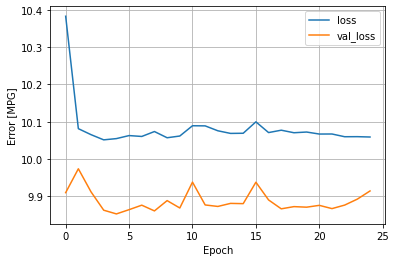

Epoch 1/40
105/105 [==============================] - 3s 21ms/step - loss: 10.1792 - mean_squared_error: 0.1778 - mean_absolute_error: 0.3408 - val_loss: 9.8465 - val_mean_squared_error: 0.1676 - val_mean_absolute_error: 0.3292

Epoch 00001: val_loss did not improve from 9.84417
Epoch 2/40
105/105 [==============================] - 3s 25ms/step - loss: 10.0385 - mean_squared_error: 0.1778 - mean_absolute_error: 0.3409 - val_loss: 9.8639 - val_mean_squared_error: 0.1668 - val_mean_absolute_error: 0.3284

Epoch 00002: val_loss did not improve from 9.84417
Epoch 3/40
105/105 [==============================] - 3s 25ms/step - loss: 10.0499 - mean_squared_error: 0.1780 - mean_absolute_error: 0.3410 - val_loss: 9.8936 - val_mean_squared_error: 0.1663 - val_mean_absolute_error: 0.3281

Epoch 00003: val_loss did not improve from 9.84417
Epoch 4/40
105/105 [==============================] - 3s 25ms/step - loss: 10.0408 - mean_squared_error: 0.1762 - mean_absolute_error: 0.3395 - val_loss: 9.8468

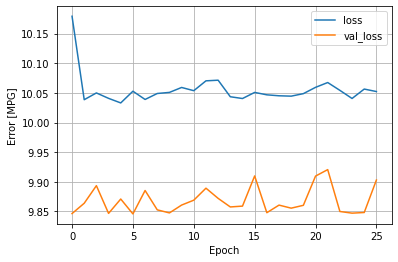

Epoch 1/50
105/105 [==============================] - 2s 14ms/step - loss: 10.1546 - mean_squared_error: 0.1771 - mean_absolute_error: 0.3403 - val_loss: 9.8674 - val_mean_squared_error: 0.1667 - val_mean_absolute_error: 0.3284

Epoch 00001: val_loss did not improve from 9.84417
Epoch 2/50
105/105 [==============================] - 3s 25ms/step - loss: 10.0378 - mean_squared_error: 0.1768 - mean_absolute_error: 0.3401 - val_loss: 9.8505 - val_mean_squared_error: 0.1673 - val_mean_absolute_error: 0.3288

Epoch 00002: val_loss did not improve from 9.84417
Epoch 3/50
105/105 [==============================] - 2s 18ms/step - loss: 10.0378 - mean_squared_error: 0.1763 - mean_absolute_error: 0.3397 - val_loss: 9.8457 - val_mean_squared_error: 0.1677 - val_mean_absolute_error: 0.3293

Epoch 00003: val_loss did not improve from 9.84417
Epoch 4/50
105/105 [==============================] - 3s 29ms/step - loss: 10.0486 - mean_squared_error: 0.1766 - mean_absolute_error: 0.3399 - val_loss: 9.8574

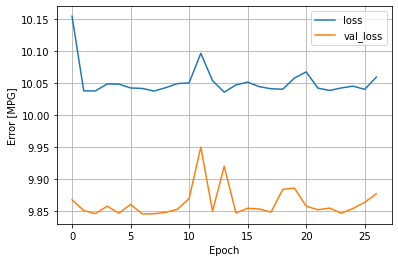

In [ ]:
trainPreTrainedNetworksClassifiers(listOfPreTrainedNetworks=classifiers,
                                   df=df,test_df=test_df, y_train=y_train,
                                   y_test=y_test, is_classification=isClassificationDict[targetColumn],
                                   init_learning_rate=0.1,numberEpochsPerIteration=20,numberOfIterations=5,
                                  patience= 20)


In [ ]:
# def createFineTuneFaceNet(classifier_pretrained_facenet, name="cutFaceNet"):
#   barebonesFacenet= facenet.layers[1]
#   fineTuneFacenet=Sequential(name=name)
#   fineTuneFacenet.add(Input(shape=(barebonesFacenet.layers[-2].input.shape[1],)))
#   # barebonesFacenet.layers[-2].trainable=False
#   fineTuneFacenet.add(barebonesFacenet.layers[-2])
#   fineTuneFacenet.add(barebonesFacenet.layers[-1])
  
#   fineTuneFacenet.add(classifier_pretrained_facenet)
#   fineTuneFacenet.trainable=True
#   for l in fineTuneFacenet.layers:
#       print(l.name, l.trainable)
#   return fineTuneFacenet


def createFineTuneNetwork(oldClassifier):
  name=oldClassifier.name
  oldModel=nameToModelDict[name]
  barebonesNetwork= oldModel.layers[1]
  numberOfLayersToInclude=numberOfLayersToIncludeDict[name]
  fineTuneModel=Sequential(name=name)
  if(numberOfLayersToInclude==0):
    fineTuneModel.add(Input(shape=(barebonesNetwork.layers[-1].input.shape[-1],)))
    # fineTuneModel.add(Dense(barebonesNetwork.layers[-1].output.shape[1]))
  else:
    fineTuneModel.add(Input(shape=(barebonesNetwork.layers[-numberOfLayersToInclude].input.shape[1],)))
    for negativeIndex in range(numberOfLayersToInclude, 0, -1):
      fineTuneModel.add(barebonesNetwork.layers[-negativeIndex])
  fineTuneModel.add(oldClassifier)
  fineTuneModel.trainable=True

  # print("\n\nthese are the layers of ",fineTuneModel.name )
  # for l in fineTuneModel.layers:
  #     print(l.name, l.trainable)
  return fineTuneModel




In [ ]:
fineTunedModels= list()
for classifier in classifiers:
  finetunedModel= createFineTuneNetwork(classifier)
  fineTunedModels.append(finetunedModel)

In [ ]:
# model=fineTunedModels[2]

In [ ]:
# keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
# x_train_facenet=readEmbeding(df,[nameToCutNameDict[model.name]])
# x_test_facenet=readEmbeding(test_df,[nameToCutNameDict[model.name]])

# print(x_train_facenet.shape)
# print(x_test_facenet.shape)




In [ ]:

# print(y_train.shape)
# print(y_test.shape)

In [ ]:
# # for index, model in enumerate(fineTunedModels):
# model.compile(
#   optimizer="adam",
#   loss= tf.keras.losses.MeanAbsolutePercentageError(),
#   metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ]
# )



In [ ]:
# model.fit(
#   x_train_facenet,
#     y_train,
#   validation_data=(x_test_facenet,y_test),
#   epochs=5,
#   batch_size=32,
# )

In [ ]:
# # THIS SHOULD BE WORKING but it doesnt. i will just do it manually. 

# def buildBeastModel(models, dropout_posibility=0.5,L2_lambda=0.1 , y_train=None):
#   is_classification=isClassificationDict[targetColumn]
#   listOfNodes=[4*len(models), len(models)]
#   if (is_classification==True):
#      listOfNodes=listOfNodes+[y_train[0].shape[0]]
#   else:
#      listOfNodes=listOfNodes+[1]

#   inputs= list()
#   modelLayers= list()
#   for index, model in enumerate(models):
#     name=model.name+"_input"
#     print(name)

#     currentInput=keras.Input(  shape=( model.input_shape[-1],), name=name)
#     inputs.append(currentInput)
#     # somethingDifferent= cutLastLayer(model) (currentInput)
#     somethingDifferent= model(currentInput)

#     modelLayers.append(somethingDifferent)
#   # print(len(modelLayers))
  
#   # Merge all available features into a single large vector via concatenation
#   x = layers.concatenate(modelLayers, axis=-1)

#   priority_pred = layers.Dense(1, name="priority")(x)

#   # Instantiate an end-to-end model predicting both priority and department
#   model = keras.Model(
#       inputs=[title_input, body_input, tags_input],
#       outputs=priority_pred
#   )

#   # classifier=Sequential(name="final_"+ targetColumn )
#   # for index, numberOfNodesInLayer in enumerate(listOfNodes):
#   #   if(index!=len(listOfNodes)-1):
#   #     classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
#   #     classifier.add(tf.keras.layers.Dropout(dropout_posibility))
#   #   else:
#   #     if(is_classification==False):
#   #       classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,kernel_initializer=Heinitializer))
#   #     else:
#   #       classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,activation='softmax',kernel_initializer=Heinitializer))  
#   # final=classifier(x)

#   # model = keras.Model(
#   # inputs=inputs,
#   # outputs=final
#   # )
#   return model

In [ ]:

title_input = keras.Input( shape=(fineTunedModels[0].input_shape[-1]   ,), name="title")  # Variable-length sequence of ints
body_input = keras.Input(shape=(fineTunedModels[1].input_shape[-1]  ,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(    shape=(fineTunedModels[2].input_shape[-1] ,), name="tags")  # Binary vectors of size `num_tags`

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = cutLastLayer(fineTunedModels[0])  (title_input)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features =   cutLastLayer(fineTunedModels[1])   (body_input)

tag_features =  cutLastLayer(fineTunedModels[2])   (tags_input)


# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tag_features])


is_classification=isClassificationDict[targetColumn]
listOfNodes=[4*3, 3]
if (is_classification==True):
    listOfNodes=listOfNodes+[y_train[0].shape[0]]
else:
    listOfNodes=listOfNodes+[1]
L2_lambda=0.1
dropout_posibility=0.5





classifier=Sequential()
classifier.add(Input(shape=(x.get_shape()[-1],)))
for index, numberOfNodesInLayer in enumerate(listOfNodes):
  if(index!=len(listOfNodes)-1):
    classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
    classifier.add(tf.keras.layers.Dropout(dropout_posibility))
  else:
    if(is_classification==False):
      classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,kernel_initializer=Heinitializer))
    else:
      classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,activation='softmax',kernel_initializer=Heinitializer))  
final=classifier(x)

model = keras.Model(
inputs=[title_input, body_input, tags_input],
outputs=final
)

# # Stick a logistic regression for priority prediction on top of the features
# priority_pred = layers.Dense(1, name="priority")(x)

# # Instantiate an end-to-end model predicting both priority and department
# model = keras.Model(
#     inputs=[title_input, body_input, tags_input],
#     outputs=priority_pred
# )

In [ ]:
x_train_dic={}
x_test_dic={}
keyNames=["title","body", "tags" ]
for model, keyName in zip(fineTunedModels, keyNames):
  x_train_dic[keyName]=readEmbeding(df,[nameToCutNameDict[model.name]])
  x_test_dic[keyName]=readEmbeding(test_df,[nameToCutNameDict[model.name]])


In [ ]:
for key, value in x_train_dic.items():
  print(x_train_dic[key].shape)

(3336, 1792)
(3336, 160)
(3336, 2622)


In [ ]:
model.compile(
    optimizer="adam",
    loss= tf.keras.losses.MeanAbsolutePercentageError(),
    metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ]
)

In [ ]:
# model.fit(
#     x_train_dic,
#         y_train,
#     validation_data=(x_test_dic,y_test),
#     epochs=20,
#     batch_size=32,
# )

Epoch 1/20
105/105 [==============================] - 5s 32ms/step - loss: 79.4340 - mean_squared_error: 7.9575 - mean_absolute_error: 2.5671 - val_loss: 65.5209 - val_mean_squared_error: 4.6061 - val_mean_absolute_error: 2.1067
Epoch 2/20
105/105 [==============================] - 4s 35ms/step - loss: 67.1429 - mean_squared_error: 6.1671 - mean_absolute_error: 2.1988 - val_loss: 52.6607 - val_mean_squared_error: 3.2260 - val_mean_absolute_error: 1.7365
Epoch 3/20
  3/105 [..............................] - ETA: 3s - loss: 54.9830 - mean_squared_error: 4.2871 - mean_absolute_error: 1.7845

KeyboardInterrupt: ignored

105/105 [==============================] - 5s 32ms/step - loss: 56.6275 - mean_squared_error: 4.8033 - mean_absolute_error: 1.8920 - val_loss: 48.7372 - val_mean_squared_error: 2.8296 - val_mean_absolute_error: 1.6327

Epoch 00001: val_loss improved from inf to 48.73723, saving model to weights.hdf5


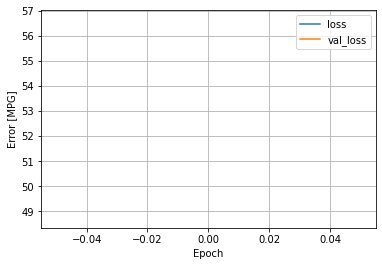

Epoch 1/2
105/105 [==============================] - 5s 31ms/step - loss: 55.6079 - mean_squared_error: 4.6163 - mean_absolute_error: 1.8601 - val_loss: 46.2713 - val_mean_squared_error: 2.5801 - val_mean_absolute_error: 1.5552

Epoch 00001: val_loss improved from 48.73723 to 46.27127, saving model to weights.hdf5
Epoch 2/2
105/105 [==============================] - 3s 32ms/step - loss: 53.9245 - mean_squared_error: 4.4378 - mean_absolute_error: 1.8112 - val_loss: 43.8059 - val_mean_squared_error: 2.3484 - val_mean_absolute_error: 1.4773

Epoch 00002: val_loss improved from 46.27127 to 43.80588, saving model to weights.hdf5


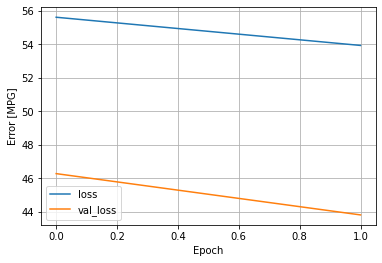

{'loss': [56.62750244140625, 55.60789489746094, 53.92445755004883],
 'mean_absolute_error': [1.891971230506897,
  1.8600658178329468,
  1.8112452030181885],
 'mean_squared_error': [4.803261756896973,
  4.616316795349121,
  4.437756538391113],
 'val_loss': [48.73722839355469, 46.27127456665039, 43.80588150024414],
 'val_mean_absolute_error': [1.632697582244873,
  1.555205225944519,
  1.477276086807251],
 'val_mean_squared_error': [2.8295786380767822,
  2.5800695419311523,
  2.348370313644409]}

In [ ]:
trainWithLearningRateDecay( model, x_train_dic, y_train, x_test_dic,y_test, 
                           init_learning_rate=0.001, numberEpochsPerIteration=2,
                           numberOfIterations=2, patience=10, is_classification=False, 
                           returnBestModel=True, otherMetricts= ["mean_squared_error", "mean_absolute_error", "val_mean_squared_error", "val_mean_absolute_error"] )

In [ ]:
# def buildBeastModel(model1, model2, listOfNodes=[3,1], dropout_posibility=0.5,L2_lambda=0.1 ):

#   title_input = keras.Input(  shape=(model1.input_shape[1],), name="title")  # Variable-length sequence of ints
#   body_input = keras.Input(shape=(model2.input_shape[1],), name="body")  # Variable-length sequence of ints


#   # Reduce sequence of embedded words in the title into a single 128-dimensional vector
#   title_features = cutLastLayer(model1) (title_input)
#   # Reduce sequence of embedded words in the body into a single 32-dimensional vector
#   body_features = cutLastLayer(model2, hasAddonModel=False) (body_input)

#   # Merge all available features into a single large vector via concatenation
#   x = layers.concatenate([title_features, body_features], axis=-1)


#   # final=Dense(1, name="priority") (x)

#   classifier=Sequential()
#   for index, numberOfNodesInLayer in enumerate(listOfNodes):
#     if(index!=len(listOfNodes)-1):
#       classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
#       classifier.add(tf.keras.layers.Dropout(dropout_posibility))
#     else:
#       if(is_classification==False):
#         classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,kernel_initializer=Heinitializer))
#       else:
#         classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,activation='softmax',kernel_initializer=Heinitializer))  
#   final=classifier(x)

#   model = keras.Model(
#   inputs=[title_input, body_input],
#   outputs=final
#   )

#   # priority_pred = layers.Dense(16, name="classifier_dense1")(x)
#   # priority_pred = layers.Dense(8, name="classifier_dense2")(priority_pred)
#   # priority_pred = layers.Dense(4, name="classifier_dense3")(priority_pred)
#   # priority_pred = layers.Dense(1, name="priority")(priority_pred)
#   # # # Stick a department classifier on top of the features
#   # # department_pred = layers.Dense(num_departments, name="department")(x)

#   # # Instantiate an end-to-end model predicting both priority and department
#   # model = keras.Model(
#   #     inputs=[title_input, body_input],
#   #     outputs=priority_pred,
#   # )
#   return model

In [ ]:
# def buildBeastModel(models, dropout_posibility=0.5,L2_lambda=0.1 , y_train=None):
#   title_input = keras.Input( shape=(models[0].input_shape[-1]   ,), name="title")  # Variable-length sequence of ints
#   body_input = keras.Input(shape=(models[1].input_shape[-1]  ,), name="body")  # Variable-length sequence of ints
#   tags_input = keras.Input(    shape=(models[2].input_shape[-1] ,), name="tags")  # Binary vectors of size `num_tags`

#   # Reduce sequence of embedded words in the title into a single 128-dimensional vector
#   title_features = cutLastLayer(models[0])  (title_input)
#   # Reduce sequence of embedded words in the body into a single 32-dimensional vector
#   body_features =   cutLastLayer(models[1])   (body_input)

#   tag_features =  cutLastLayer(models[2])   (tags_input)


#   # Merge all available features into a single large vector via concatenation
#   x = layers.concatenate([title_features, body_features, tag_features])

#   is_classification=isClassificationDict[targetColumn]
#   listOfNodes=[4*len(models), len(models)]
#   if (is_classification==True):
#      listOfNodes=listOfNodes+[y_train[0].shape[0]]
#   else:
#      listOfNodes=listOfNodes+[1]

#   is_classification=False
#   classifier=Sequential()
#   classifier.add(Input(shape=(x.get_shape()[-1],)))
#   for index, numberOfNodesInLayer in enumerate(listOfNodes):
#     if(index!=len(listOfNodes)-1):
#       classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer))
#       classifier.add(tf.keras.layers.Dropout(dropout_posibility))
#     else:
#       if(is_classification==False):
#         classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,kernel_initializer=Heinitializer))
#       else:
#         classifier.add(tf.keras.layers.Dense(numberOfNodesInLayer,activation='softmax',kernel_initializer=Heinitializer))  
#   final=classifier(x)

#   model = keras.Model(
#   inputs=[title_input, body_input, tags_input],
#   outputs=final
#   )
#   return model 

In [ ]:
# model= buildBeastModel(fineTunedModels)

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 1792)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, 160)]        0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 2622)]       0                                            
__________________________________________________________________________________________________
sequential_16 (Sequential)      (None, 64)           640961      title[0][0]                      
____________________________________________________________________________________________

In [ ]:
model.inputs

[<KerasTensor: shape=(None, 1792) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 160) dtype=float32 (created by layer 'body')>,
 <KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'tags')>]

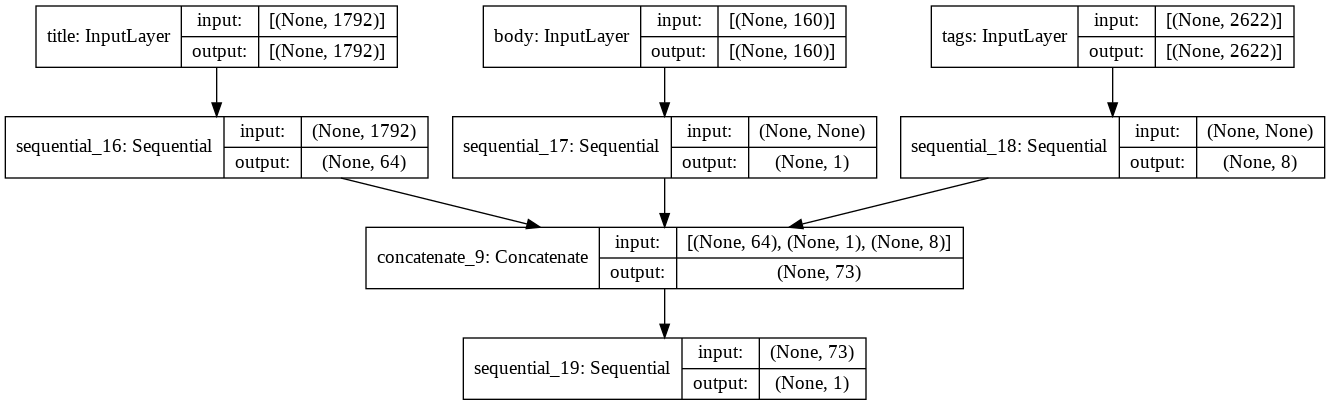

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


In [ ]:
x_train_dic={}
x_test_dic={}
keyNames=["title","body", "tags" ]
for model, keyName in zip(fineTunedModels, keyNames):
  x_train_dic[keyName]=readEmbeding(df,[nameToCutNameDict[model.name]])
  x_test_dic[keyName]=readEmbeding(test_df,[nameToCutNameDict[model.name]])


In [ ]:
# x_train_dic["title"]=x_train_dic["facenet_input"]
# x_train_dic["body"]=x_train_dic["deepID_input"]
# x_train_dic["tags"]=x_train_dic["vggface_input"]


# x_test_dic["title"]=x_test_dic["facenet_input"]
# x_test_dic["body"]=x_test_dic["deepID_input"]
# x_test_dic["tags"]=x_test_dic["vggface_input"]

In [ ]:
for key, value in x_train_dic.items():
  print(x_train_dic[key].shape)

(3336, 1792)
(3336, 160)
(3336, 2622)


In [ ]:
model.compile(
    optimizer="adam",
    loss= tf.keras.losses.MeanAbsolutePercentageError(),
    metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError() ]
)

In [ ]:
x_train_dic.keys()

dict_keys(['facenet_input', 'deepID_input', 'vggface_input', 'title', 'body', 'tags'])

In [ ]:
model.fit(
    x_train_dic,
        y_train,
    validation_data=(x_test_dic,y_test),
    epochs=20,
    batch_size=32,
)

Epoch 1/20


ValueError: ignored

In [ ]:
model.fit(
    x_train_dic,
        y_train,
    # validation_data=(x_test_dic,y_test),
    epochs=5,
    batch_size=32,
)

In [ ]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

In [ ]:
print(x_train1.shape)
print(x_train2.shape)
print(x_test1.shape)
print(x_test2.shape)

print(y_train.shape)
print(y_train.shape)

In [ ]:
history= trainWithLearningRateDecay(model, x_train=  {"title": title_data, "body": body_data},
                           y_train=y_train,
                           x_test={"title": x_test1,
                                    "body": x_test2}, 
                           y_test= y_test,
                           init_learning_rate=0.1, numberEpochsPerIteration=20,
                           numberOfIterations=6, patience=20, is_classification=False
                    )

In [ ]:
predictions= model.predict({"title": x_test1, "body": x_test2})

In [ ]:
np.mean(tf.keras.metrics.mean_squared_error(
    y_true=y_test, y_pred=predictions))

In [ ]:
np.mean(tf.keras.metrics.mean_absolute_error(
    y_true=y_test, y_pred=predictions))

In [ ]:
np.mean(tf.keras.metrics.mean_absolute_percentage_error(
    y_true=y_test, y_pred=predictions))

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
x_train= readEmbeding(df,[fineFacenet.name,fineFacenet.name])
x_test= readEmbeding(test_df,[fineFacenet.name,fineFacenet.name])

In [ ]:
fineFacenet.summary()

In [ ]:
for layer in fineFacenet.layers:
  print(layer.name)

In [ ]:
y_train= trust_train
y_test= trust_test

x_train= readEmbeding(df,["facenet","facenet"])
x_test= readEmbeding(test_df,["facenet","facenet"])

In [ ]:
classifier= trainReggressionModel(x_train, y_train, x_test, y_test, listOfNodes=[16,8,4],
                          init_learning_rate=0.001, dropout_posibility=0.1,L2_lambda=0.0001, 
                          numberEpochsPerIteration=20,numberOfIterations=3,patience= 10, returnModel=True)

In [ ]:
predictions=classifier.predict(x_test)

In [ ]:
classifier.layers[-1:]

In [ ]:
classifier.layers[-2].output.shape

In [ ]:
# With a Keras function
get_all_layer_outputs = K.function([classifier.layers[0].input],
                                  classifier.layers[-2].output)

layer_output = get_all_layer_outputs([x_test]) # return the same thing

In [ ]:
layer_output.shape

In [ ]:
classifier.input.shape

In [ ]:
fineFacenet.summary()

In [ ]:
def cutLayersOut(model, numberOfLayersToCut, useResizeLayerInModel=True):
  newModel = tf.keras.Model( inputs= model.layers[0].input, 
  outputs= model.layers[-numberOfLayersToCut].output\
  )
  if(useResizeLayerInModel==True):
    newModel=putResizeLayerInModel(newModel)
  return newModel


In [ ]:
fineFacenet.layers[-1].summary()

In [ ]:
newModel = tf.keras.Model( inputs= model.layers[0].input, 
  outputs= model.layers[-numberOfLayersToCut].output\
  )

In [ ]:
  tuto = tf.keras.Model( inputs= fineFacenet.layers[0].input, 
  outputs= fineFacenet.layers[2].output\
  )

In [ ]:
tuto = tf.keras.Model(inputs=fineFacenet.layers[0].input, outputs= fineFacenet.layers[-3])

In [ ]:
import numpy as np

# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(combinedClassifier.input.shape[1],))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs,listOfModels=[fineFacenet,fineFacenet])

# # Construct and compile an instance of CustomModel
# inputs = keras.Input(shape=(fineFacenet.input.shape[1],))
# outputs = keras.layers.Dense(1)(inputs)
# model = CustomModel(inputs, outputs ,model=fineFacenet)





In [ ]:
fineFacenet.predict(readEmbeding(df,[fineFacenet.name])).shape

In [ ]:
fineFacenet.name

In [ ]:
x_train.shape

In [ ]:
model.compile(
    optimizer="adam",
  loss= tf.keras.losses.MeanAbsolutePercentageError(),
  run_eagerly=True)

history= model.fit(
      x_train,
      y_train,
      validation_data=(x_test, y_test),
    epochs= 20,
    )

In [ ]:



branches = [fineFacenet.input, fineFacenet.input]
mixed = Concatenate(axis=-1, name='Block8_6_Concatenate')(branches)

inputs = keras.Input(shape=(mixed.input.shape[1],))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs,listOfModels=[fineFacenet,fineFacenet])

In [ ]:
class CustomModel(keras.Model):
    def __init__(self,inputs, outputs, listOfModels):
      super().__init__(inputs,outputs)
      # self(inputs, outputs)
      self.listOfModels=listOfModels
      tempSize=0
      for model in listOfModels:
        tempSize=tempSize+model.output.shape[1]
      self.sizeOfPredictions=tempSize

    # def __init__(self,inputs, outputs, model):
    #   super().__init__(inputs,outputs)
    #   # self(inputs, outputs)
    #   self.model=model
    #   self.sizeOfPredictions=model.output.shape[1]

    #single outputNode
    def train_step(self, data):
      # Unpack the data. Its structure depends on your model and
      # on what you pass to `fit()`.
      x, y = data

      with tf.GradientTape() as tape:
          numpyX=x.numpy()
          countSoFar=0
          lista=[]
          for model in self.listOfModels:
            lista.append(model.input.shape[1]+countSoFar)
            countSoFar=countSoFar+model.input.shape[1]
          lista.pop()
          newX=np.split(numpyX,lista, axis=1)

          banchSize=numpyX.shape[0]
          outputs=None
          sizeSoFar=0
          for model, input in zip(self.listOfModels, newX):
            current_y_pred = model(input)  # Forward pass            
            if (outputs==None):
              outputs=current_y_pred
            else:
              outputs=outputs+current_y_pred
          outputs=outputs/len(model)


          y_pred = self(inputs, training=True)  # Forward pass



          # y_pred = self(x, training=True)  # Forward pass
          # Compute the loss value
          # (the loss function is configured in `compile()`)
          loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

      # Compute gradients
      trainable_vars = self.trainable_variables
      gradients = tape.gradient(loss, trainable_vars)
      # Update weights
      self.optimizer.apply_gradients(zip(gradients, trainable_vars))
      # Update metrics (includes the metric that tracks the loss)
      self.compiled_metrics.update_state(y, y_pred)
      # Return a dict mapping metric names to current value
      return {m.name: m.result() for m in self.metrics}
    # #only tre-trained layers
    # def train_step(self, data):
    #   # Unpack the data. Its structure depends on your model and
    #   # on what you pass to `fit()`.
    #   x, y = data

    #   with tf.GradientTape() as tape:
    #       inputs=np.empty(self.sizeOfPredictions)
    #       numpyX=x.numpy()
    #       countSoFar=0
    #       lista=[]
    #       for model in self.listOfModels:
    #         # print(type(model.inputs))
    #         lista.append(model.input.shape[1]+countSoFar)
    #         countSoFar=countSoFar+model.input.shape[1]
    #       lista.pop()
    #       newX=np.split(numpyX,lista, axis=1)

    #       banchSize=numpyX.shape[0]
    #       inputs=np.empty((banchSize, self.sizeOfPredictions))
    #       sizeSoFar=0
    #       for model, input in zip(self.listOfModels, newX):
    #         print("before")
    #         current_y_pred = model(input)  # Forward pass            
    #         inputs[:,sizeSoFar:sizeSoFar+current_y_pred.shape[1]]=current_y_pred
    #         sizeSoFar=sizeSoFar+current_y_pred.shape[1]
    #         print(current_y_pred.shape)


    #       y_pred = self(inputs, training=True)  # Forward pass



    #       # y_pred = self(x, training=True)  # Forward pass
    #       # Compute the loss value
    #       # (the loss function is configured in `compile()`)
    #       loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

    #   # Compute gradients
    #   trainable_vars = self.trainable_variables
    #   gradients = tape.gradient(loss, trainable_vars)
    #   # Update weights
    #   self.optimizer.apply_gradients(zip(gradients, trainable_vars))
    #   # Update metrics (includes the metric that tracks the loss)
    #   self.compiled_metrics.update_state(y, y_pred)
    #   # Return a dict mapping metric names to current value
    #   return {m.name: m.result() for m in self.metrics}
    